# **Tensores Matemáticos: Introducción y Aplicaciones en Computación**

> *De los escalares a los qubits entrelazados — una guía interactiva con teoría y código Python.*
>
> *Cada sección incluye la explicación teórica seguida de código ejecutable para experimentar.*
>
> **Autor:** Mr. Piay

## Tabla de contenido

- **Parte 1 — Fundamentos matemáticos**

  1. [Partamos de lo conocido: arrays de números](#1-partamos-de-lo-conocido-arrays-de-números)
  2. [La diferencia clave: cambiar de perspectiva](#2-la-diferencia-clave-cambiar-de-perspectiva)
  3. [Entonces, ¿qué es un tensor?](#3-entonces-qué-es-un-tensor)
  4. [¿Todo array es un tensor?](#4-todo-array-es-un-tensor)
  5. [El orden del tensor: niveles de complejidad](#5-el-orden-del-tensor-niveles-de-complejidad)
  6. [Transformación de componentes](#6-transformación-de-componentes)
  7. [Invariantes: lo que no cambia](#7-invariantes-lo-que-no-cambia)

- **Parte 2 — Tensores en Machine Learning**

  8. [Tensores en ML: arrays con significado](#8-tensores-en-ml-arrays-con-significado)
  9. [Jerarquía de datos: de escalares a tensores 4D](#9-jerarquía-de-datos-de-escalares-a-tensores-4d)
  10. [Operaciones tensoriales en Python](#10-operaciones-tensoriales-en-python)
  11. [Ejemplo práctico: red neuronal simple (MNIST)](#11-ejemplo-práctico-red-neuronal-simple-mnist)
  12. [Procesando lotes (batches)](#12-procesando-lotes-batches)
  13. [Frameworks modernos: PyTorch](#13-frameworks-modernos-pytorch)

- **Parte 3 — Tensores en Computación Cuántica**

  14. [El mundo cuántico: superposición y entrelazamiento](#14-el-mundo-cuántico-superposición-y-entrelazamiento)
  15. [El estado de un qubit: un vector complejo](#15-el-estado-de-un-qubit-un-vector-complejo)
  16. [Puertas cuánticas: matrices que transforman qubits](#16-puertas-cuánticas-matrices-que-transforman-qubits)
  17. [Múltiples qubits: el producto tensorial](#17-múltiples-qubits-el-producto-tensorial)
  18. [Entrelazamiento cuántico](#18-entrelazamiento-cuántico)
  19. [Puertas en sistemas multi-qubit](#19-puertas-en-sistemas-multi-qubit)
  20. [Ejemplo: algoritmo de Deutsch-Jozsa](#20-ejemplo-algoritmo-de-deutsch-jozsa)

- **Cierre**

  21. [Mapa comparativo: tensores en tres mundos](#21-mapa-comparativo-tensores-en-tres-mundos)
  22. [Conclusión](#22-conclusión)
  23. [Glosario rápido](#23-glosario-rápido)

## Requisitos

Ejecuta las siguientes celdas para instalar dependencias e importar las bibliotecas necesarias.

In [1]:
%pip install numpy matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración de visualización
np.set_printoptions(precision=4, suppress=True)
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 11

# **PARTE 1 — Fundamentos Matemáticos**

*¿Qué es realmente un tensor y por qué importa?*


## **1. Partamos de lo conocido: arrays de números**

En programación y matemáticas trabajamos constantemente con colecciones de números organizados en estructuras. A estas estructuras las llamamos *arrays*.

**Ejemplo A — Temperaturas de una semana:** [20, 22, 19, 21, 23, 20, 18] °C. Siete números, uno por cada día. Un array simple.

**Ejemplo B — Velocidad del viento:** [5, 3] km/h (componente Este, componente Norte). También es un array: dos números organizados en una estructura.

Pero aunque ambos son arrays, **no representan lo mismo**. La diferencia se revela cuando cambiamos nuestra forma de observar.


### Práctica: Sección 1

In [3]:
# Ejemplo A: Temperaturas de una semana (array simple)

temperaturas = np.array([20, 22, 19, 21, 23, 20, 18])
dias = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']

print("Temperaturas de la semana (°C):")
print(f"  Array: {temperaturas}")
print(f"  Forma (shape): {temperaturas.shape}")
print(f"  Dimensiones: {temperaturas.ndim}")
print(f"  Promedio: {temperaturas.mean():.1f} °C")
print(f"  Máxima: {temperaturas.max()} °C ({dias[temperaturas.argmax()]})")
print(f"  Mínima: {temperaturas.min()} °C ({dias[temperaturas.argmin()]})")
print()
print("Esto es un array simple: 7 mediciones independientes.")
print("NO es un tensor — no tiene significado geométrico ni reglas de transformación.")

Temperaturas de la semana (°C):
  Array: [20 22 19 21 23 20 18]
  Forma (shape): (7,)
  Dimensiones: 1
  Promedio: 20.4 °C
  Máxima: 23 °C (Vie)
  Mínima: 18 °C (Dom)

Esto es un array simple: 7 mediciones independientes.
NO es un tensor — no tiene significado geométrico ni reglas de transformación.


In [4]:
# Ejemplo B: Velocidad del viento (vector con significado geométrico)

velocidad = np.array([5, 3])  # km/h (Este, Norte)

magnitud = np.linalg.norm(velocidad)
angulo = np.degrees(np.arctan2(velocidad[1], velocidad[0]))

print("Velocidad del viento:")
print(f"  Componentes: Este={velocidad[0]}, Norte={velocidad[1]} km/h")
print(f"  Forma (shape): {velocidad.shape}")
print(f"  Magnitud: {magnitud:.2f} km/h")
print(f"  Dirección: {angulo:.1f}° desde el Este")
print()
print("Esto SÍ es un tensor (de orden 1 = vector):")
print("  - Tiene significado geométrico (magnitud + dirección)")
print("  - Sus componentes cambian al rotar los ejes")
print("  - La magnitud permanece invariante")

Velocidad del viento:
  Componentes: Este=5, Norte=3 km/h
  Forma (shape): (2,)
  Magnitud: 5.83 km/h
  Dirección: 31.0° desde el Este

Esto SÍ es un tensor (de orden 1 = vector):
  - Tiene significado geométrico (magnitud + dirección)
  - Sus componentes cambian al rotar los ejes
  - La magnitud permanece invariante


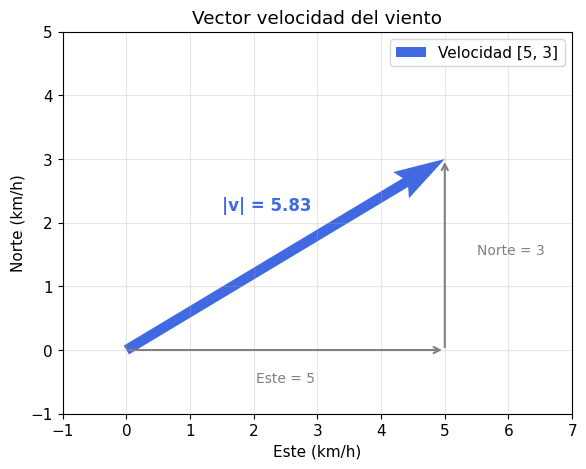

In [5]:
# Visualizar el vector velocidad del viento

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Dibujar el vector
ax.quiver(0, 0, 5, 3, angles='xy', scale_units='xy', scale=1,
          color='royalblue', width=0.02, label='Velocidad [5, 3]')

# Anotar componentes
ax.annotate('', xy=(5, 0), xytext=(0, 0),
            arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))
ax.annotate('', xy=(5, 3), xytext=(5, 0),
            arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))
ax.text(2.5, -0.5, 'Este = 5', ha='center', color='gray', fontsize=10)
ax.text(5.5, 1.5, 'Norte = 3', ha='left', color='gray', fontsize=10)
ax.text(1.5, 2.2, f'|v| = {np.linalg.norm([5,3]):.2f}', fontsize=12,
        color='royalblue', fontweight='bold')

ax.set_xlim(-1, 7)
ax.set_ylim(-1, 5)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.set_xlabel('Este (km/h)')
ax.set_ylabel('Norte (km/h)')
ax.set_title('Vector velocidad del viento')
ax.legend()
plt.tight_layout()
plt.show()

## **2. La diferencia clave: cambiar de perspectiva**

### Temperaturas

Si pasamos de Celsius a Fahrenheit, los números cambian por una simple conversión de unidades: 20 °C → 68 °F. No hay direcciones, orientación ni geometría involucrada. Es un cambio puramente numérico.

### Velocidad del viento

Ahora imaginemos que rotamos nuestros ejes de referencia 90° en sentido antihorario. El viento sigue soplando exactamente igual, pero nuestra **descripción numérica cambia por completo**: de [5, 3] en ejes originales a [3, −5] en los nuevos ejes.

Observa lo que ocurre:

- El **fenómeno físico** (el viento) no cambia.
- La **descripción numérica** sí cambia.
- Los números cambian según una **regla matemática precisa** (la matriz de rotación).

Esto revela algo profundo: la velocidad del viento no es solo un par de números. Es un **objeto geométrico** que existe independientemente de cómo lo describamos.


### Práctica: Sección 2

In [6]:
# --- Temperaturas: conversión de unidades (NO es un cambio de coordenadas)
temp_celsius = 20
temp_fahrenheit = temp_celsius * 9/5 + 32

print("=== TEMPERATURAS ===")
print(f"{temp_celsius}°C  →  {temp_fahrenheit}°F")
print("Solo cambia la escala numérica. No hay geometría involucrada.")
print()

=== TEMPERATURAS ===
20°C  →  68.0°F
Solo cambia la escala numérica. No hay geometría involucrada.



In [7]:
# --- Velocidad del viento: rotación de ejes (cambio de coordenadas real)
def matriz_rotacion(angulo_grados):
    """Crea una matriz de rotación 2D."""
    theta = np.radians(angulo_grados)
    return np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta),  np.cos(theta)]])

v = np.array([5, 3])  # Velocidad original
angulo = 90            # Rotar ejes 90° antihorario

R = matriz_rotacion(angulo)
v_rotado = R @ v

print("=== VELOCIDAD DEL VIENTO ===")
print(f"Ejes originales:   v = {v}")
print(f"Ejes rotados {angulo}°:  v = {v_rotado}")
print()
print(f"Magnitud original:  |v| = {np.linalg.norm(v):.4f} km/h")
print(f"Magnitud tras rotar: |v| = {np.linalg.norm(v_rotado):.4f} km/h")
print()
print("Los números cambiaron, pero la magnitud es la misma.")
print("El viento no cambió; solo cambió nuestra descripción.")

=== VELOCIDAD DEL VIENTO ===
Ejes originales:   v = [5 3]
Ejes rotados 90°:  v = [-3.  5.]

Magnitud original:  |v| = 5.8310 km/h
Magnitud tras rotar: |v| = 5.8310 km/h

Los números cambiaron, pero la magnitud es la misma.
El viento no cambió; solo cambió nuestra descripción.


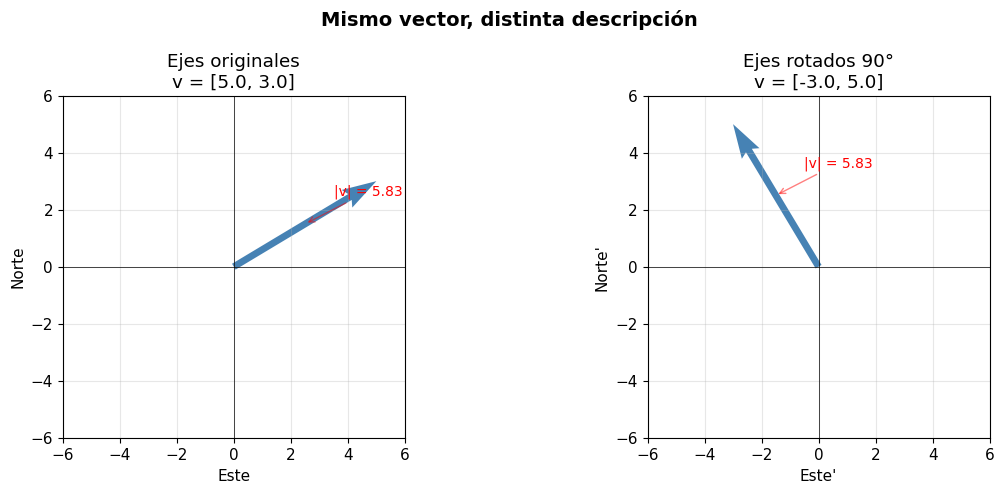

In [8]:
# Visualizar la rotación
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

for ax, vec, titulo, ejes in [
    (ax1, v, 'Ejes originales', ('Este', 'Norte')),
    (ax2, v_rotado, 'Ejes rotados 90°', ("Este'", "Norte'"))
]:
    ax.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1,
              color='steelblue', width=0.02)
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.set_xlabel(ejes[0])
    ax.set_ylabel(ejes[1])
    ax.set_title(f'{titulo}\nv = [{vec[0]:.1f}, {vec[1]:.1f}]')
    ax.annotate(f'|v| = {np.linalg.norm(vec):.2f}',
                xy=(vec[0]/2, vec[1]/2),
                xytext=(vec[0]/2 + 1, vec[1]/2 + 1),
                fontsize=10, color='red',
                arrowprops=dict(arrowstyle='->', color='red', alpha=0.5))

fig.suptitle('Mismo vector, distinta descripción', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## **3. Entonces, ¿qué es un tensor?**

Un **tensor** es un objeto matemático abstracto que cumple estas propiedades:

1. **Representa una cantidad con estructura geométrica o física.**
2. **Existe independientemente del sistema de coordenadas.**
3. **Se expresa mediante números (componentes) cuando elegimos una base.**
4. **Sus componentes cambian según reglas matemáticas precisas al cambiar de referencia.**
5. **La entidad que describe permanece invariante.**

### La distinción esencial

> **TENSOR ≠ COMPONENTES**
>
> **Tensor** → la entidad geométrica o física.
> **Componentes** → los números que lo representan en un sistema de coordenadas particular.

**Analogía:** Una mesa no cambia si caminas alrededor de ella. Lo que cambia es tu *perspectiva* — qué lado ves primero, qué ángulo percibes. La mesa (el tensor) sigue siendo la misma; tu descripción (las componentes) es lo que varía.


### Práctica: Sección 3

In [9]:
# Demostración: el mismo vector descrito en muchos sistemas de referencia

v_original = np.array([5, 3])  # El tensor (vector) original

print("El MISMO vector visto desde distintos sistemas de referencia:\n")
print(f"{'Ángulo':>8}  {'Componentes':>20}  {'Magnitud':>10}")
print("-" * 45)

for angulo in range(0, 360, 45):
    R = matriz_rotacion(angulo)
    v_nuevo = R @ v_original
    mag = np.linalg.norm(v_nuevo)
    print(f"{angulo:>7}°  [{v_nuevo[0]:>8.3f}, {v_nuevo[1]:>8.3f}]  {mag:>10.4f}")

print("\nLas componentes cambian. La magnitud (invariante) no.")

El MISMO vector visto desde distintos sistemas de referencia:

  Ángulo           Componentes    Magnitud
---------------------------------------------
      0°  [   5.000,    3.000]      5.8310
     45°  [   1.414,    5.657]      5.8310
     90°  [  -3.000,    5.000]      5.8310
    135°  [  -5.657,    1.414]      5.8310
    180°  [  -5.000,   -3.000]      5.8310
    225°  [  -1.414,   -5.657]      5.8310
    270°  [   3.000,   -5.000]      5.8310
    315°  [   5.657,   -1.414]      5.8310

Las componentes cambian. La magnitud (invariante) no.


## **4. ¿Todo array es un tensor?**

**No.**

Volvamos a nuestros dos ejemplos iniciales:

| Propiedad | Temperaturas [20, 22, 19, ...] | Velocidad [5, 3] |
|---|---|---|
| ¿Es un array? | Sí | Sí |
| ¿Tiene significado geométrico? | No (son mediciones independientes) | Sí (magnitud + dirección) |
| ¿Sigue reglas de transformación espacial? | No | Sí (rotación de ejes) |
| ¿Es un tensor? | No (cada temperatura individual es un escalar) | Sí (es un vector = tensor de orden 1) |

Un tensor se caracteriza por:

1. **Significado geométrico o físico** — describe algo real que existe en el espacio.
2. **Leyes de transformación** — sus componentes cambian de forma predecible al cambiar coordenadas.
3. **Relación entre direcciones** — conecta una o más direcciones del espacio.

Un array común puede ser útil computacionalmente, pero eso no lo convierte automáticamente en un tensor.


### Práctica: Sección 4

In [10]:
# Array que NO es un tensor: lista de temperaturas
temperaturas = np.array([20, 22, 19, 21, 23, 20, 18])

# Array que SÍ es un tensor: vector velocidad
velocidad = np.array([5, 3])

print("=== COMPARACIÓN ===")
print()
print(f"Temperaturas: {temperaturas}")
print(f"  ¿Es un array?                           Sí")
print(f"  ¿Tiene significado geométrico?          No (son mediciones independientes)")
print(f"  ¿Sigue reglas de transformación?        No")
print(f"  ¿Es un tensor?                          No")
print()
print(f"Velocidad: {velocidad}")
print(f"  ¿Es un array?                           Sí")
print(f"  ¿Tiene significado geométrico?          Sí (magnitud + dirección)")
print(f"  ¿Sigue reglas de transformación?        Sí (rotación de ejes)")
print(f"  ¿Es un tensor?                          Sí (vector = tensor de orden 1)")

=== COMPARACIÓN ===

Temperaturas: [20 22 19 21 23 20 18]
  ¿Es un array?                           Sí
  ¿Tiene significado geométrico?          No (son mediciones independientes)
  ¿Sigue reglas de transformación?        No
  ¿Es un tensor?                          No

Velocidad: [5 3]
  ¿Es un array?                           Sí
  ¿Tiene significado geométrico?          Sí (magnitud + dirección)
  ¿Sigue reglas de transformación?        Sí (rotación de ejes)
  ¿Es un tensor?                          Sí (vector = tensor de orden 1)


## **5. El orden del tensor: niveles de complejidad**

El **orden** (también llamado *rango*) de un tensor indica cuántos índices se necesitan para especificar cada componente, o equivalentemente, cuántas direcciones están involucradas.

### Orden 0 — Escalar

Un solo número. No depende de direcciones. Ejemplos: temperatura (20 °C), masa (5 kg), tiempo (3.2 s).

> Un escalar es el mismo número sin importar cómo orientes tus ejes.

### Orden 1 — Vector

Una cantidad con magnitud y dirección. Necesita **un índice** para recorrer sus componentes. Ejemplo: velocidad en 3D, v = (vₓ, vᵧ, v_z).

> En un espacio de *n* dimensiones, un vector tiene *n* componentes.

### Orden 2 — Tensor de segundo orden (puede representarse como una matriz)

Relaciona **dos direcciones simultáneamente**. Necesita **dos índices** (fila y columna). Un ejemplo clásico es el **tensor de esfuerzos** en 3D: una matriz 3×3 con 9 componentes, donde cada componente σ_ij describe la fuerza en la dirección *j* que actúa sobre una superficie perpendicular a la dirección *i*.

### Orden 3 y superiores

Describen relaciones entre tres o más direcciones. Aparecen en fenómenos como la piezoelectricidad (orden 3), la elasticidad general (orden 4), relatividad general y física cuántica.

| Orden | Nombre | Componentes en espacio 3D | Fórmula |
|-------|--------|---------------------------|---------|
| 0 | Escalar | 1 | 3⁰ |
| 1 | Vector | 3 | 3¹ |
| 2 | Matriz | 9 | 3² |
| 3 | Cubo | 27 | 3³ |
| 4 | Hipercubo | 81 | 3⁴ |

> Mientras mayor el orden, más complejas las relaciones que el tensor puede describir.


### Práctica: Sección 5

In [11]:
# === ORDEN 0: ESCALAR ===
# Un solo número. No depende de direcciones.

temperatura = 20.0  # °C
masa = 5.0          # kg
tiempo = 3.2        # s

# En NumPy: un array 0-dimensional
escalar = np.array(42.0)

print("=== ORDEN 0: ESCALAR ===")
print(f"Temperatura: {temperatura}°C")
print(f"Como array NumPy: {escalar}")
print(f"Forma (shape): {escalar.shape}  →  0 índices")
print(f"Dimensión (ndim): {escalar.ndim}")
print(f"Número de componentes: {escalar.size}")

=== ORDEN 0: ESCALAR ===
Temperatura: 20.0°C
Como array NumPy: 42.0
Forma (shape): ()  →  0 índices
Dimensión (ndim): 0
Número de componentes: 1


In [12]:
# === ORDEN 1: VECTOR ===
# Magnitud y dirección. Un índice para recorrer componentes.

velocidad_3d = np.array([3, -1, 4])  # m/s en (x, y, z)

print("=== ORDEN 1: VECTOR ===")
print(f"Velocidad 3D: {velocidad_3d} m/s")
print(f"Forma (shape): {velocidad_3d.shape}  →  1 índice")
print(f"Dimensión (ndim): {velocidad_3d.ndim}")
print(f"Número de componentes: {velocidad_3d.size}")
print(f"Acceso por índice: v[0]={velocidad_3d[0]}, v[1]={velocidad_3d[1]}, v[2]={velocidad_3d[2]}")
print(f"Magnitud: |v| = {np.linalg.norm(velocidad_3d):.4f} m/s")

=== ORDEN 1: VECTOR ===
Velocidad 3D: [ 3 -1  4] m/s
Forma (shape): (3,)  →  1 índice
Dimensión (ndim): 1
Número de componentes: 3
Acceso por índice: v[0]=3, v[1]=-1, v[2]=4
Magnitud: |v| = 5.0990 m/s


In [13]:
# === ORDEN 2: TENSOR DE SEGUNDO ORDEN (MATRIZ) ===
# Relaciona dos direcciones. Dos índices (fila, columna).

# Tensor de esfuerzos: describe fuerzas internas en un material
sigma = np.array([
    [100,  20,   0],   # Fuerzas en superficie perpendicular a x
    [ 20,  50,   0],   # Fuerzas en superficie perpendicular a y
    [  0,   0,  30]    # Fuerzas en superficie perpendicular a z
])  # Unidades: MPa

print("=== ORDEN 2: TENSOR DE ESFUERZOS ===")
print(f"Forma (shape): {sigma.shape}  →  2 índices")
print(f"Dimensión (ndim): {sigma.ndim}")
print(f"Número de componentes: {sigma.size}")
print(f"\nTensor σ (MPa):")
print(sigma)
print(f"\nσ[0,1] = {sigma[0,1]} MPa  →  fuerza en dirección y sobre superficie ⊥ a x")
print(f"σ[1,0] = {sigma[1,0]} MPa  →  fuerza en dirección x sobre superficie ⊥ a y")
print("(La simetría σ[i,j] = σ[j,i] es una propiedad física del tensor de esfuerzos)")

=== ORDEN 2: TENSOR DE ESFUERZOS ===
Forma (shape): (3, 3)  →  2 índices
Dimensión (ndim): 2
Número de componentes: 9

Tensor σ (MPa):
[[100  20   0]
 [ 20  50   0]
 [  0   0  30]]

σ[0,1] = 20 MPa  →  fuerza en dirección y sobre superficie ⊥ a x
σ[1,0] = 20 MPa  →  fuerza en dirección x sobre superficie ⊥ a y
(La simetría σ[i,j] = σ[j,i] es una propiedad física del tensor de esfuerzos)


In [14]:
# === ORDENES SUPERIORES ===
# Cantidad de componentes en espacio 3D: 3^orden

print("Componentes de un tensor en espacio 3D:\n")
print(f"{'Orden':>6}  {'Nombre':>15}  {'Componentes':>12}  {'Fórmula':>10}")
print("-" * 50)

nombres = ['Escalar', 'Vector', 'Matriz', 'Cubo', 'Hipercubo']
for orden in range(5):
    n_componentes = 3 ** orden
    print(f"{orden:>6}  {nombres[orden]:>15}  {n_componentes:>12}  {'3^' + str(orden):>10}")

# Crear ejemplos reales
print("\nEjemplos en NumPy:")
for orden, nombre in enumerate(nombres[:4]):
    t = np.zeros([3] * orden) if orden > 0 else np.array(0.0)
    print(f"  Orden {orden} ({nombre}): shape = {t.shape}, ndim = {t.ndim}, size = {t.size}")

Componentes de un tensor en espacio 3D:

 Orden           Nombre   Componentes     Fórmula
--------------------------------------------------
     0          Escalar             1         3^0
     1           Vector             3         3^1
     2           Matriz             9         3^2
     3             Cubo            27         3^3
     4        Hipercubo            81         3^4

Ejemplos en NumPy:
  Orden 0 (Escalar): shape = (), ndim = 0, size = 1
  Orden 1 (Vector): shape = (3,), ndim = 1, size = 3
  Orden 2 (Matriz): shape = (3, 3), ndim = 2, size = 9
  Orden 3 (Cubo): shape = (3, 3, 3), ndim = 3, size = 27


## **6. Transformación de componentes**

Lo que distingue a un tensor de un simple array es **cómo cambian sus números al rotar los ejes**.

### Ejemplo: vector en 2D

Consideremos un vector velocidad **v** = [3, 4] km/h en ejes (Este, Norte). Si rotamos los ejes 90° en sentido antihorario, las nuevas componentes se obtienen mediante la **matriz de rotación**:

$$
\mathbf{v'} = R \cdot \mathbf{v}
$$

Los números cambian de [3, 4] a [4, −3], pero la **magnitud** permanece:

$$
|\mathbf{v}| = \sqrt{3^2 + 4^2} = \sqrt{4^2 + (-3)^2} = 5 \text{ km/h}
$$

El vector (tensor) es el mismo; las componentes se adaptan al nuevo sistema de referencia.

> Esta regla de transformación es lo que define matemáticamente a un tensor.


### Práctica: Sección 6

In [15]:
# Transformación de un VECTOR (tensor de orden 1)

v = np.array([3, 4])  # Vector original
angulo = 90  # grados

R = matriz_rotacion(angulo)
v_nuevo = R @ v

print("=== Transformación de un vector ===")
print(f"\nMatriz de rotación ({angulo}°):")
print(R)
print(f"\nVector original:       v  = {v}")
print(f"Vector transformado:   v' = {v_nuevo}")
print(f"\nMagnitud original:  |v|  = {np.linalg.norm(v):.4f}")
print(f"Magnitud nueva:     |v'| = {np.linalg.norm(v_nuevo):.4f}")
print("\nRegla: v' = R · v  (multiplicación matriz-vector)")

=== Transformación de un vector ===

Matriz de rotación (90°):
[[ 0. -1.]
 [ 1.  0.]]

Vector original:       v  = [3 4]
Vector transformado:   v' = [-4.  3.]

Magnitud original:  |v|  = 5.0000
Magnitud nueva:     |v'| = 5.0000

Regla: v' = R · v  (multiplicación matriz-vector)


In [16]:
# Transformación de una MATRIZ (tensor de orden 2)
# Regla: σ' = R · σ · R^T

sigma = np.array([[100, 20],
                  [ 20, 50]])  # Tensor de esfuerzos 2D

angulo = 45  # grados
R = matriz_rotacion(angulo)

# Transformación de tensor de orden 2
sigma_nuevo = R @ sigma @ R.T

print("=== Transformación de un tensor de orden 2 ===")
print(f"\nTensor original σ:")
print(sigma)
print(f"\nTensor tras rotar {angulo}° (σ' = R·σ·Rᵀ):")
print(sigma_nuevo)
print(f"\nTraza original:  {np.trace(sigma):.4f}")
print(f"Traza nueva:     {np.trace(sigma_nuevo):.4f}")
print(f"\nDet original:    {np.linalg.det(sigma):.4f}")
print(f"Det nuevo:       {np.linalg.det(sigma_nuevo):.4f}")
print("\nTraza y determinante son INVARIANTES: no cambian al rotar.")

=== Transformación de un tensor de orden 2 ===

Tensor original σ:
[[100  20]
 [ 20  50]]

Tensor tras rotar 45° (σ' = R·σ·Rᵀ):
[[55. 25.]
 [25. 95.]]

Traza original:  150.0000
Traza nueva:     150.0000

Det original:    4600.0000
Det nuevo:       4600.0000

Traza y determinante son INVARIANTES: no cambian al rotar.


## **7. Invariantes: lo que no cambia**

Si las componentes de un tensor cambian con el sistema de referencia, ¿hay algo que permanezca constante? Sí: los **invariantes**.

### Para un vector (orden 1)

La **magnitud** es invariante: $|\mathbf{v}| = \sqrt{v_x^2 + v_y^2 + v_z^2}$ es constante en cualquier sistema de ejes.

### Para una matriz/tensor de orden 2

La **traza** (suma de la diagonal) es invariante. Por ejemplo, para un tensor de esfuerzos con componentes [[100, 20], [20, 50]], la traza es 150 y no cambia al rotar los ejes. El **determinante** (100×50 − 20×20 = 4600) tampoco cambia.

> Los invariantes son las "huellas dactilares" de un tensor: permiten identificarlo
> sin importar desde qué perspectiva lo observes.

### Idea central de la Parte 1

> **Un tensor no se define por ser una tabla de números, sino por CÓMO sus componentes cambian cuando cambia el sistema de referencia.**
>
> Los números pueden variar. La entidad que describen permanece.

Por eso los tensores son el lenguaje natural de la física, la geometría moderna y muchas áreas de la computación.


### Práctica: Sección 7

In [17]:
# Verificar invariantes para múltiples rotaciones

sigma = np.array([[100, 20],
                  [ 20, 50]])

print("Tensor de esfuerzos σ visto desde distintos ángulos:\n")
print(f"{'Ángulo':>7}  {'σ[0,0]':>8}  {'σ[0,1]':>8}  {'σ[1,0]':>8}  {'σ[1,1]':>8}  │  {'Traza':>8}  {'Det':>10}")
print("-" * 78)

for angulo in range(0, 181, 30):
    R = matriz_rotacion(angulo)
    s = R @ sigma @ R.T
    print(f"{angulo:>6}°  {s[0,0]:>8.2f}  {s[0,1]:>8.2f}  {s[1,0]:>8.2f}  {s[1,1]:>8.2f}  │  {np.trace(s):>8.2f}  {np.linalg.det(s):>10.2f}")

print("\nLas componentes cambian (columnas izquierdas).")
print("Los invariantes permanecen constantes (columnas derechas).")

Tensor de esfuerzos σ visto desde distintos ángulos:

 Ángulo    σ[0,0]    σ[0,1]    σ[1,0]    σ[1,1]  │     Traza         Det
------------------------------------------------------------------------------
     0°    100.00     20.00     20.00     50.00  │    150.00     4600.00
    30°     70.18     31.65     31.65     79.82  │    150.00     4600.00
    60°     45.18     11.65     11.65    104.82  │    150.00     4600.00
    90°     50.00    -20.00    -20.00    100.00  │    150.00     4600.00
   120°     79.82    -31.65    -31.65     70.18  │    150.00     4600.00
   150°    104.82    -11.65    -11.65     45.18  │    150.00     4600.00
   180°    100.00     20.00     20.00     50.00  │    150.00     4600.00

Las componentes cambian (columnas izquierdas).
Los invariantes permanecen constantes (columnas derechas).


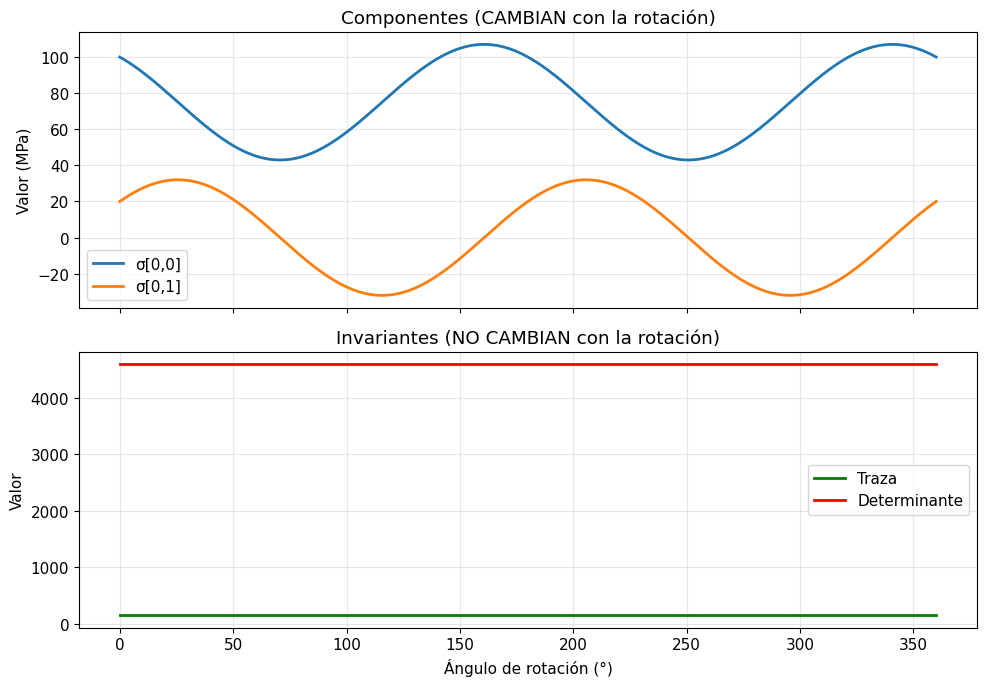

In [18]:
# Visualizar cómo cambian las componentes pero no los invariantes

angulos = np.arange(0, 361, 1)
componentes_00 = []
componentes_01 = []
trazas = []
determinantes = []

for ang in angulos:
    R = matriz_rotacion(ang)
    s = R @ sigma @ R.T
    componentes_00.append(s[0, 0])
    componentes_01.append(s[0, 1])
    trazas.append(np.trace(s))
    determinantes.append(np.linalg.det(s))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

ax1.plot(angulos, componentes_00, label='σ[0,0]', linewidth=2)
ax1.plot(angulos, componentes_01, label='σ[0,1]', linewidth=2)
ax1.set_ylabel('Valor (MPa)')
ax1.set_title('Componentes (CAMBIAN con la rotación)')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(angulos, trazas, label='Traza', linewidth=2, color='green')
ax2.plot(angulos, determinantes, label='Determinante', linewidth=2, color='red')
ax2.set_ylabel('Valor')
ax2.set_xlabel('Ángulo de rotación (°)')
ax2.set_title('Invariantes (NO CAMBIAN con la rotación)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **PARTE 2 — Tensores en Machine Learning**

*Arrays multidimensionales que impulsan la inteligencia artificial.*


## **8. Tensores en ML: arrays con significado**

En *machine learning*, el término **tensor** se utiliza de manera más flexible que en física o geometría. Aquí, un tensor suele referirse simplemente a un **array multidimensional de números**.

> **Nota importante:** Los "tensores" de ML no siempre son tensores matemáticos en sentido estricto: no necesariamente siguen leyes de transformación geométrica. Sin embargo, comparten la misma estructura de datos multidimensional.
>
> - En física → tensor = objeto geométrico invariante
> - En ML → tensor = contenedor multidimensional optimizado

### ¿Por qué se usa la palabra "tensor" en ML?

Porque los datos que procesan las redes neuronales poseen de forma natural múltiples dimensiones:

| Tipo de dato | Dimensiones |
|---|---|
| Imagen a color | alto × ancho × canales de color |
| Video | tiempo × alto × ancho × canales |
| Dataset tabular | muestras × características |
| Texto (embeddings) | secuencia × dimensión del embedding |

Frameworks como **TensorFlow** y **PyTorch** emplean tensores porque permiten almacenar y manipular estas estructuras de forma eficiente, especialmente en GPUs diseñadas para operaciones masivas en paralelo.


### Práctica: Sección 8

In [19]:
# Tensores en ML: arrays con significado
# Comparación: un array común vs un "tensor" en ML

# Array simple: lista de compras (sin significado geométrico ni estructura ML)
lista_compras = [3, 1, 2, 5]  # cantidades de productos
print("Array simple (lista de compras):", lista_compras)
print("  → Solo números sueltos, sin estructura espacial\n")

# "Tensor" en ML: los datos SIEMPRE tienen dimensiones con significado
import numpy as np

# Imagen en escala de grises: alto × ancho
imagen_gris = np.random.rand(28, 28)
print(f"Imagen gris:  shape = {imagen_gris.shape}  → (alto, ancho)")

# Imagen a color: alto × ancho × canales
imagen_color = np.random.rand(224, 224, 3)
print(f"Imagen color: shape = {imagen_color.shape} → (alto, ancho, RGB)")

# Dataset tabular: muestras × características
dataset = np.random.rand(100, 5)
print(f"Dataset:      shape = {dataset.shape}    → (muestras, características)")

# Embedding de texto: secuencia × dimensión
texto = np.random.rand(50, 300)
print(f"Embedding:    shape = {texto.shape}     → (palabras, dimensión)")

# Lote de imágenes: batch × alto × ancho × canales
batch = np.random.rand(32, 224, 224, 3)
print(f"Batch imgs:   shape = {batch.shape} → (batch, alto, ancho, RGB)")

print("\n→ En ML cada dimensión tiene un SIGNIFICADO específico.")
print("  Eso es lo que distingue un tensor de ML de un array cualquiera.")

Array simple (lista de compras): [3, 1, 2, 5]
  → Solo números sueltos, sin estructura espacial

Imagen gris:  shape = (28, 28)  → (alto, ancho)
Imagen color: shape = (224, 224, 3) → (alto, ancho, RGB)
Dataset:      shape = (100, 5)    → (muestras, características)
Embedding:    shape = (50, 300)     → (palabras, dimensión)
Batch imgs:   shape = (32, 224, 224, 3) → (batch, alto, ancho, RGB)

→ En ML cada dimensión tiene un SIGNIFICADO específico.
  Eso es lo que distingue un tensor de ML de un array cualquiera.


## **9. Jerarquía de datos: de escalares a tensores 4D**

### Escalar — Orden 0

Un único número. Representa métricas o hiperparámetros: la pérdida del modelo (0.345), la precisión (0.92) o la tasa de aprendizaje (0.001).

### Vector — Orden 1

Una lista de números. Representa características de una persona [edad, altura, peso], probabilidades de un clasificador [0.1, 0.7, 0.2] o embeddings de palabras (vectores de 100–300 dimensiones).

### Matriz — Orden 2

Una tabla bidimensional. Representa imágenes en escala de grises (28×28 píxeles), datasets tabulares (100 muestras × 5 características) o pesos de una capa neuronal (784 entradas × 128 neuronas).

### Tensor 3D — Orden 3

Un "cubo" de números. Representa imágenes a color (224 × 224 × 3 canales RGB) o secuencias de texto (50 palabras × 300 dimensiones de embedding).

### Tensor 4D — Orden 4

Un "hipercubo". Representa **lotes (batches)** de datos para procesamiento en paralelo: por ejemplo, 32 imágenes RGB de 224×224 forman un tensor de dimensiones 32 × 224 × 224 × 3.

> **¿Por qué usar lotes?** Porque procesar múltiples ejemplos simultáneamente
> permite paralelización en GPU, acelerando enormemente el entrenamiento.


### Práctica: Sección 9

In [20]:
# === ESCALAR (orden 0) ===
loss = np.float64(0.345)
accuracy = np.float64(0.92)
learning_rate = np.float64(0.001)

print("=== ESCALAR (orden 0) ===")
print(f"Pérdida:             {loss}")
print(f"Precisión:           {accuracy}")
print(f"Tasa de aprendizaje: {learning_rate}")
print()

=== ESCALAR (orden 0) ===
Pérdida:             0.345
Precisión:           0.92
Tasa de aprendizaje: 0.001



In [21]:
# === VECTOR (orden 1) ===
caracteristicas = np.array([25, 1.75, 70])              # edad, altura, peso
probabilidades = np.array([0.1, 0.7, 0.2])              # clasificador de 3 clases
embedding = np.random.randn(300)                        # embedding de una palabra

print("=== VECTOR (orden 1) ===")
print(f"Características: {caracteristicas}  →  shape: {caracteristicas.shape}")
print(f"Probabilidades:  {probabilidades}  →  shape: {probabilidades.shape}")
print(f"Embedding:       [{embedding[0]:.3f}, {embedding[1]:.3f}, ..., {embedding[-1]:.3f}]  →  shape: {embedding.shape}")
print()

=== VECTOR (orden 1) ===
Características: [25.    1.75 70.  ]  →  shape: (3,)
Probabilidades:  [0.1 0.7 0.2]  →  shape: (3,)
Embedding:       [-0.367, 0.371, ..., 1.386]  →  shape: (300,)



=== MATRIZ (orden 2) ===
Imagen 28×28:        shape = (28, 28)   →  ndim = 2
Dataset 100×5:       shape = (100, 5)  →  ndim = 2
Pesos 784×128:       shape = (784, 128) →  ndim = 2



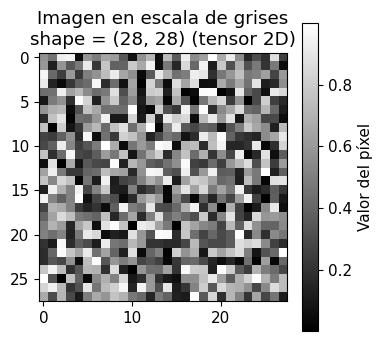

In [22]:
# === MATRIZ (orden 2) ===
imagen_gris = np.random.rand(28, 28)        # Imagen MNIST
dataset = np.random.rand(100, 5)            # 100 muestras, 5 características
pesos_capa = np.random.randn(784, 128)      # Pesos de una capa neuronal

print("=== MATRIZ (orden 2) ===")
print(f"Imagen 28×28:        shape = {imagen_gris.shape}   →  ndim = {imagen_gris.ndim}")
print(f"Dataset 100×5:       shape = {dataset.shape}  →  ndim = {dataset.ndim}")
print(f"Pesos 784×128:       shape = {pesos_capa.shape} →  ndim = {pesos_capa.ndim}")
print()

# Visualizar la imagen
plt.figure(figsize=(4, 4))
plt.imshow(imagen_gris, cmap='gray')
plt.title(f'Imagen en escala de grises\nshape = {imagen_gris.shape} (tensor 2D)')
plt.colorbar(label='Valor del píxel')
plt.show()

=== TENSOR 3D (orden 3) ===
Imagen a color: shape = (224, 224, 3)  →  alto × ancho × canales RGB
ndim = 3, total de números = 150,528



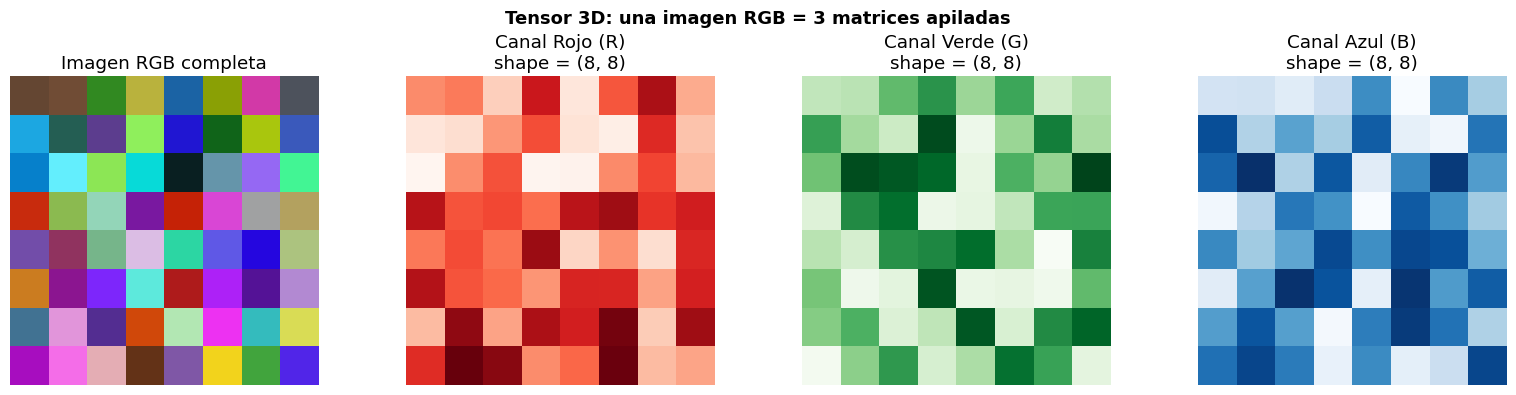

In [23]:
# === TENSOR 3D (orden 3) ===
imagen_color = np.random.rand(224, 224, 3)   # Imagen RGB

print("=== TENSOR 3D (orden 3) ===")
print(f"Imagen a color: shape = {imagen_color.shape}  →  alto × ancho × canales RGB")
print(f"ndim = {imagen_color.ndim}, total de números = {imagen_color.size:,}")
print()

# Visualizar cada canal por separado
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

img_small = np.random.rand(8, 8, 3)  # Versión pequeña para visualizar

axes[0].imshow(img_small)
axes[0].set_title('Imagen RGB completa')

colores = ['Reds', 'Greens', 'Blues']
nombres_canal = ['Rojo (R)', 'Verde (G)', 'Azul (B)']
for i in range(3):
    axes[i+1].imshow(img_small[:, :, i], cmap=colores[i])
    axes[i+1].set_title(f'Canal {nombres_canal[i]}\nshape = (8, 8)')

for ax in axes:
    ax.axis('off')

fig.suptitle('Tensor 3D: una imagen RGB = 3 matrices apiladas', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

In [24]:
# === TENSOR 4D (orden 4) ===
batch_size = 32
lote_imagenes = np.random.rand(batch_size, 224, 224, 3)

print("=== TENSOR 4D (orden 4) ===")
print(f"Lote de imágenes: shape = {lote_imagenes.shape}")
print(f"  Dimensión 0: {batch_size} imágenes (batch)")
print(f"  Dimensión 1: 224 píxeles (alto)")
print(f"  Dimensión 2: 224 píxeles (ancho)")
print(f"  Dimensión 3: 3 canales (RGB)")
print(f"\nndim = {lote_imagenes.ndim}")
print(f"Total de números = {lote_imagenes.size:,}")
print(f"Memoria ≈ {lote_imagenes.nbytes / 1e6:.1f} MB")

=== TENSOR 4D (orden 4) ===
Lote de imágenes: shape = (32, 224, 224, 3)
  Dimensión 0: 32 imágenes (batch)
  Dimensión 1: 224 píxeles (alto)
  Dimensión 2: 224 píxeles (ancho)
  Dimensión 3: 3 canales (RGB)

ndim = 4
Total de números = 4,816,896
Memoria ≈ 38.5 MB


### Resumen de la jerarquía de tensores en ML

| Orden | Nombre    | Ejemplo en ML                    |
|:-----:|-----------|----------------------------------|
| 0     | Escalar   | loss = 0.345                     |
| 1     | Vector    | probabilidades = [0.1, 0.7, 0.2] |
| 2     | Matriz    | imagen 28×28                     |
| 3     | Tensor 3D | imagen RGB 224×224×3             |
| 4     | Tensor 4D | batch 32×224×224×3               |

## **10. Operaciones tensoriales en Python**

En ML, los tensores se manipulan constantemente. Bibliotecas como **NumPy**, **PyTorch** y **TensorFlow** ofrecen herramientas optimizadas para ello. Las operaciones fundamentales son:

### 1) Creación de tensores

Se pueden crear tensores de ceros, unos, valores aleatorios o a partir de listas existentes, especificando la forma deseada.

### 2) Operaciones elemento a elemento

Incluyen suma, resta, multiplicación y división entre tensores de igual forma. Cada posición se opera de forma independiente. En redes neuronales esto se usa para aplicar funciones de activación, normalizaciones y otras transformaciones.

### 3) Multiplicación matricial (producto punto)

Es la **operación fundamental** de las redes neuronales. Cada neurona calcula esencialmente: **salida = pesos · entradas + sesgo**. Esta operación permite combinar información de múltiples variables en una sola salida.

### 4) Cambio de forma (reshape)

Permite reorganizar los datos **sin modificar su contenido**. Esencial para adaptar tensores a las capas de una red: por ejemplo, convertir una imagen de 28×28 en un vector de 784 elementos.

> Reshape cambia la forma del contenedor, no el contenido.

### 5) Indexación y slicing

Seleccionar partes específicas de un tensor: una imagen dentro de un lote, una región de píxeles o una columna de un dataset. Es crucial para la manipulación de datos y el preprocesamiento.

### 6) Reducción de dimensiones (aggregation)

Operaciones como suma, promedio, máximo o mínimo permiten condensar información a lo largo de un eje. Se utilizan para calcular métricas, normalizar datos y resumir predicciones.

> Consulta el **notebook complementario** para ver cada operación implementada en Python con NumPy.


### Práctica: Sección 10

In [25]:
# 1) Creación de tensores

ceros     = np.zeros((3, 4))          # Matriz 3×4 de ceros
unos      = np.ones((2, 3, 4))        # Tensor 3D de unos
aleatorio = np.random.rand(5, 5)      # Matriz 5×5 aleatoria [0, 1)
desde_lista = np.array([1, 2, 3])     # Vector desde lista

print("=== Creación de tensores ===")
print(f"Ceros:      shape = {ceros.shape}")
print(f"Unos:       shape = {unos.shape}")
print(f"Aleatorio:  shape = {aleatorio.shape}")
print(f"Desde lista: shape = {desde_lista.shape}")

=== Creación de tensores ===
Ceros:      shape = (3, 4)
Unos:       shape = (2, 3, 4)
Aleatorio:  shape = (5, 5)
Desde lista: shape = (3,)


In [26]:
# 2) Operaciones elemento a elemento

A = np.array([1, 2, 3])
B = np.array([4, 5, 6])

print("=== Operaciones elemento a elemento ===")
print(f"A     = {A}")
print(f"B     = {B}")
print(f"A + B = {A + B}   (suma)")
print(f"A * B = {A * B}  (multiplicación)")
print(f"A - B = {A - B}")
print(f"A / B = {A / B}")
print(f"A ** 2 = {A ** 2}   (potencia)")

=== Operaciones elemento a elemento ===
A     = [1 2 3]
B     = [4 5 6]
A + B = [5 7 9]   (suma)
A * B = [ 4 10 18]  (multiplicación)
A - B = [-3 -3 -3]
A / B = [0.25 0.4  0.5 ]
A ** 2 = [1 4 9]   (potencia)


In [27]:
# 3) Multiplicación matricial (producto punto)
# La operación FUNDAMENTAL de las redes neuronales

X = np.array([[1, 2],     # 2 muestras, 2 características
              [3, 4]])

W = np.array([[0.5, 0.1],  # Pesos: 2 entradas → 2 salidas
              [0.3, 0.8]])

Y = np.dot(X, W)   # También: X @ W

print("=== Multiplicación matricial ===")
print(f"Entrada X (2×2):\n{X}")
print(f"\nPesos W (2×2):\n{W}")
print(f"\nSalida Y = X · W (2×2):\n{Y}")
print(f"\nVerificación manual:")
print(f"  Y[0,0] = 1×0.5 + 2×0.3 = {1*0.5 + 2*0.3}")
print(f"  Y[0,1] = 1×0.1 + 2×0.8 = {1*0.1 + 2*0.8}")

=== Multiplicación matricial ===
Entrada X (2×2):
[[1 2]
 [3 4]]

Pesos W (2×2):
[[0.5 0.1]
 [0.3 0.8]]

Salida Y = X · W (2×2):
[[1.1 1.7]
 [2.7 3.5]]

Verificación manual:
  Y[0,0] = 1×0.5 + 2×0.3 = 1.1
  Y[0,1] = 1×0.1 + 2×0.8 = 1.7000000000000002


In [28]:
# 4) Cambio de forma (reshape)

vector = np.arange(12)  # [0, 1, 2, ..., 11]

print("=== Reshape ===")
print(f"Vector original: {vector}")
print(f"  shape: {vector.shape}")
print()

matriz = vector.reshape(3, 4)
print(f"Reshape a (3, 4):\n{matriz}")
print()

tensor_3d = vector.reshape(2, 2, 3)
print(f"Reshape a (2, 2, 3):")
print(tensor_3d)
print()
print("Mismos datos, diferente organización.")

=== Reshape ===
Vector original: [ 0  1  2  3  4  5  6  7  8  9 10 11]
  shape: (12,)

Reshape a (3, 4):
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Reshape a (2, 2, 3):
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]

Mismos datos, diferente organización.


In [29]:
# 5) Indexación y slicing

imagenes = np.random.rand(3, 4, 4)  # 3 imágenes de 4×4

print("=== Indexación y slicing ===")
print(f"Tensor de imágenes: shape = {imagenes.shape}")
print()

segunda = imagenes[1, :, :]   # Segunda imagen completa
print(f"Segunda imagen (imagenes[1,:,:]): shape = {segunda.shape}")

esquina = imagenes[0, 0:2, 0:2]  # Esquina superior izquierda
print(f"Esquina superior izq (imagenes[0, 0:2, 0:2]): shape = {esquina.shape}")
print(f"  Valores:\n{esquina}")

columna = imagenes[:, :, 0]    # Primera columna de todas las imágenes
print(f"\nPrimera columna de todas (imagenes[:,:,0]): shape = {columna.shape}")

=== Indexación y slicing ===
Tensor de imágenes: shape = (3, 4, 4)

Segunda imagen (imagenes[1,:,:]): shape = (4, 4)
Esquina superior izq (imagenes[0, 0:2, 0:2]): shape = (2, 2)
  Valores:
[[0.656  0.2425]
 [0.173  0.423 ]]

Primera columna de todas (imagenes[:,:,0]): shape = (3, 4)


In [30]:
# 6) Reducción de dimensiones

datos = np.array([[1, 2, 3],
                  [4, 5, 6]])

print("=== Reducción de dimensiones ===")
print(f"Datos:\n{datos}")
print(f"  shape: {datos.shape}")
print()
print(f"Suma total:            {np.sum(datos)}")
print(f"Promedio por columna:  {np.mean(datos, axis=0)}   (axis=0: colapsa filas)")
print(f"Máximo por fila:       {np.max(datos, axis=1)}       (axis=1: colapsa columnas)")
print(f"Mínimo total:          {np.min(datos)}")
print(f"Desviación estándar:   {np.std(datos):.4f}")

=== Reducción de dimensiones ===
Datos:
[[1 2 3]
 [4 5 6]]
  shape: (2, 3)

Suma total:            21
Promedio por columna:  [2.5 3.5 4.5]   (axis=0: colapsa filas)
Máximo por fila:       [3 6]       (axis=1: colapsa columnas)
Mínimo total:          1
Desviación estándar:   1.7078


## **11. Ejemplo práctico: red neuronal simple (MNIST)**

Veamos cómo los tensores fluyen a través de una red neuronal que clasifica dígitos escritos a mano.

### El problema

- **Entrada:** imagen de 28 × 28 píxeles en escala de grises (tensor 2D)
- **Salida:** probabilidades para 10 clases — dígitos del 0 al 9 (vector)

### Arquitectura paso a paso

| Paso | Operación | Forma del tensor |
|------|-----------|------------------|
| 0 | Imagen original | (28, 28) — tensor 2D |
| 1 | Aplanar (reshape) | (784,) — vector |
| 2 | Capa densa 1: z₁ = x · W₁ + b₁ | (128,) — vector |
| 3 | Activación ReLU: a₁ = max(0, z₁) | (128,) — vector |
| 4 | Capa densa 2: z₂ = a₁ · W₂ + b₂ | (10,) — vector |
| 5 | Softmax: convertir a probabilidades | (10,) — vector de probabilidades |

La imagen entra como una matriz de 28×28. Se aplana a un vector de 784 números. Luego pasa por dos capas densas (multiplicaciones matriciales + sesgo), con una activación ReLU intermedia que elimina valores negativos. Finalmente, Softmax convierte los 10 números de salida en probabilidades que suman 1.

### Observaciones clave

- **Cada capa transforma un tensor en otro tensor** mediante operaciones matemáticas.
- Las **multiplicaciones matriciales** son la operación central: combinan información de múltiples variables.
- Los **pesos** (W) son matrices que determinan la importancia de cada conexión.
- El **sesgo** (b) es un ajuste adicional que permite desplazar la salida.
- El resultado final es un **vector de probabilidades** cuya suma siempre es 1.

> **Idea fundamental:** Una red neuronal es una *cadena de transformaciones de tensores*.
> Aprender significa ajustar los tensores de pesos y sesgos para que estas
> transformaciones produzcan la respuesta correcta.


### Práctica: Sección 11

In [31]:
# Red neuronal paso a paso — una sola imagen

np.random.seed(42)  # Para reproducibilidad

# --- Datos de entrada
imagen = np.random.rand(28, 28)
print(f"Paso 0 │ Imagen original:    shape = {imagen.shape}  (tensor 2D)")

# --- Paso 1: Aplanar
x = imagen.reshape(784)
print(f"Paso 1 │ Aplanar (reshape):  shape = {x.shape}     (vector)")

# --- Paso 2: Capa densa 1 (784 → 128)
W1 = np.random.randn(784, 128) * 0.01  # Pesos
b1 = np.zeros(128)                      # Sesgo
z1 = np.dot(x, W1) + b1
print(f"Paso 2 │ Capa densa 1:       shape = {z1.shape}     (z1 = x·W1 + b1)")

# --- Paso 3: Activación ReLU
a1 = np.maximum(0, z1)
print(f"Paso 3 │ ReLU:               shape = {a1.shape}     (elimina negativos)")
print(f"       │  Valores negativos eliminados: {np.sum(z1 < 0)} de {len(z1)}")

# --- Paso 4: Capa densa 2 (128 → 10)
W2 = np.random.randn(128, 10) * 0.01
b2 = np.zeros(10)
z2 = np.dot(a1, W2) + b2
print(f"Paso 4 │ Capa densa 2:       shape = {z2.shape}       (z2 = a1·W2 + b2)")

# --- Paso 5: Softmax
exp_z2 = np.exp(z2 - np.max(z2))  # Estabilidad numérica
probabilidades = exp_z2 / np.sum(exp_z2)
print(f"Paso 5 │ Softmax:            shape = {probabilidades.shape}       (probabilidades)")

print(f"\n{'='*60}")
print(f"Predicción: Dígito {np.argmax(probabilidades)}")
print(f"Confianza:  {np.max(probabilidades)*100:.1f}%")
print(f"Suma de probabilidades: {np.sum(probabilidades):.6f}")

Paso 0 │ Imagen original:    shape = (28, 28)  (tensor 2D)
Paso 1 │ Aplanar (reshape):  shape = (784,)     (vector)
Paso 2 │ Capa densa 1:       shape = (128,)     (z1 = x·W1 + b1)
Paso 3 │ ReLU:               shape = (128,)     (elimina negativos)
       │  Valores negativos eliminados: 65 de 128
Paso 4 │ Capa densa 2:       shape = (10,)       (z2 = a1·W2 + b2)
Paso 5 │ Softmax:            shape = (10,)       (probabilidades)

Predicción: Dígito 0
Confianza:  10.1%
Suma de probabilidades: 1.000000


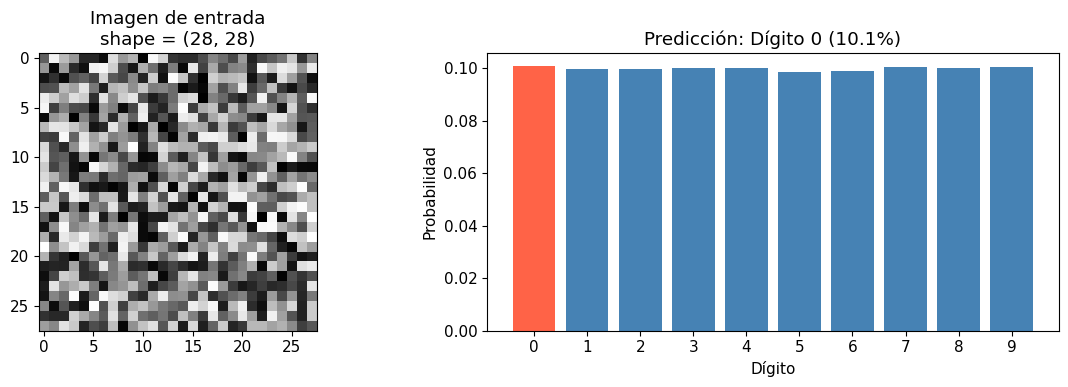

In [32]:
# Visualizar las probabilidades de salida

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Imagen de entrada
ax1.imshow(imagen, cmap='gray')
ax1.set_title(f'Imagen de entrada\nshape = {imagen.shape}')

# Probabilidades de salida
colores = ['steelblue'] * 10
colores[np.argmax(probabilidades)] = 'tomato'
ax2.bar(range(10), probabilidades, color=colores)
ax2.set_xlabel('Dígito')
ax2.set_ylabel('Probabilidad')
ax2.set_title(f'Predicción: Dígito {np.argmax(probabilidades)} ({np.max(probabilidades)*100:.1f}%)')
ax2.set_xticks(range(10))

plt.tight_layout()
plt.show()

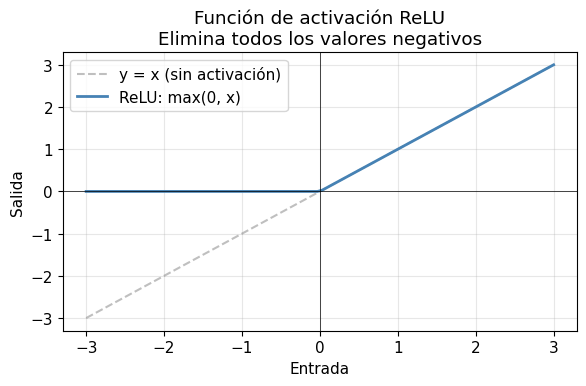

In [33]:
# Visualizar la función ReLU

x_vals = np.linspace(-3, 3, 100)
relu_vals = np.maximum(0, x_vals)

plt.figure(figsize=(6, 4))
plt.plot(x_vals, x_vals, '--', color='gray', alpha=0.5, label='y = x (sin activación)')
plt.plot(x_vals, relu_vals, color='steelblue', linewidth=2, label='ReLU: max(0, x)')
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.xlabel('Entrada')
plt.ylabel('Salida')
plt.title('Función de activación ReLU\nElimina todos los valores negativos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## **12. Procesando lotes (batches)**

En la práctica, una red neuronal casi nunca procesa una sola imagen. Procesa **muchas a la vez**, organizadas en un **lote (batch)**. Esto añade una dimensión adicional al tensor: una imagen tiene forma (28, 28), pero un lote de 32 imágenes tiene forma (32, 28, 28).

### ¿Qué ocurre internamente?

- Las **32 imágenes** pasan por la **misma transformación** simultáneamente.
- El resultado es un tensor (32, 10): 32 vectores de predicción, uno por imagen.
- El **sesgo se aplica automáticamente** a cada imagen gracias al *broadcasting* (ajuste automático de dimensiones).
- La **GPU procesa todas las imágenes en paralelo**, acelerando enormemente el entrenamiento.


### Práctica: Sección 12

In [34]:
# Procesamiento en lotes

np.random.seed(42)
batch_size = 32

# --- Lote de 32 imágenes
lote = np.random.rand(batch_size, 28, 28)
print(f"Lote original:         shape = {lote.shape}   (batch × alto × ancho)")

# --- Aplanar cada imagen
lote_flat = lote.reshape(batch_size, 784)
print(f"Lote aplanado:         shape = {lote_flat.shape}  (batch × 784)")

# --- Capa densa 1
W1 = np.random.randn(784, 128) * 0.01
b1 = np.zeros(128)
z1_batch = np.dot(lote_flat, W1) + b1  # Broadcasting automático
print(f"Después de capa 1:     shape = {z1_batch.shape}  (batch × 128)")

# --- ReLU
a1_batch = np.maximum(0, z1_batch)
print(f"Después de ReLU:       shape = {a1_batch.shape}  (batch × 128)")

# --- Capa densa 2
W2 = np.random.randn(128, 10) * 0.01
b2 = np.zeros(10)
z2_batch = np.dot(a1_batch, W2) + b2
print(f"Después de capa 2:     shape = {z2_batch.shape}   (batch × 10)")

# --- Softmax por imagen
exp_z2 = np.exp(z2_batch - np.max(z2_batch, axis=1, keepdims=True))
prob_batch = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
print(f"Probabilidades:        shape = {prob_batch.shape}   (batch × 10)")

# --- Predicciones
predicciones = np.argmax(prob_batch, axis=1)
print(f"Predicciones:          shape = {predicciones.shape}     (batch,)")
print(f"\nPrimeras 10 predicciones: {predicciones[:10]}")

Lote original:         shape = (32, 28, 28)   (batch × alto × ancho)
Lote aplanado:         shape = (32, 784)  (batch × 784)
Después de capa 1:     shape = (32, 128)  (batch × 128)
Después de ReLU:       shape = (32, 128)  (batch × 128)
Después de capa 2:     shape = (32, 10)   (batch × 10)
Probabilidades:        shape = (32, 10)   (batch × 10)
Predicciones:          shape = (32,)     (batch,)

Primeras 10 predicciones: [6 6 6 9 6 9 6 6 6 6]


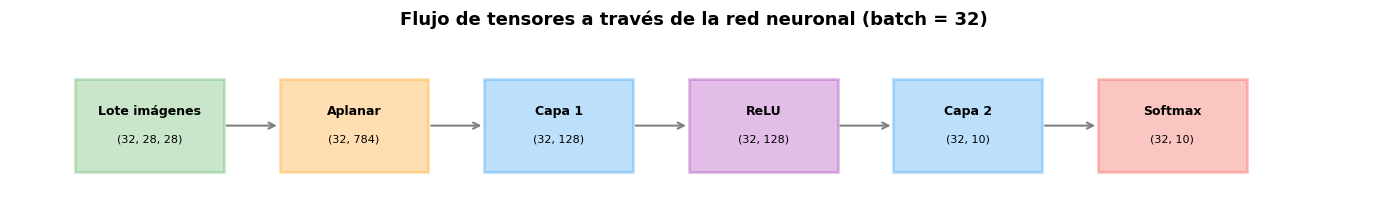

In [35]:
# Visualizar el flujo de tensores en la red

shapes = [
    ('Lote imágenes', (32, 28, 28), 'entrada'),
    ('Aplanar', (32, 784), 'reshape'),
    ('Capa 1', (32, 128), 'capa'),
    ('ReLU', (32, 128), 'activación'),
    ('Capa 2', (32, 10), 'capa'),
    ('Softmax', (32, 10), 'salida'),
]

fig, ax = plt.subplots(figsize=(14, 3))

colores_tipo = {
    'entrada': '#4CAF50',
    'reshape': '#FF9800',
    'capa': '#2196F3',
    'activación': '#9C27B0',
    'salida': '#F44336'
}

for i, (nombre, shape, tipo) in enumerate(shapes):
    x_pos = i * 2.2
    total = 1
    for s in shape:
        total *= s
    rect = plt.Rectangle((x_pos - 0.8, 0), 1.6, 1, linewidth=2,
                         edgecolor=colores_tipo[tipo],
                         facecolor=colores_tipo[tipo], alpha=0.3)
    ax.add_patch(rect)
    ax.text(x_pos, 0.65, nombre, ha='center', va='center', fontsize=9, fontweight='bold')
    ax.text(x_pos, 0.35, str(shape), ha='center', va='center', fontsize=8)

    if i < len(shapes) - 1:
        ax.annotate('', xy=((i+1)*2.2 - 0.8, 0.5), xytext=(x_pos + 0.8, 0.5),
                    arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))

ax.set_xlim(-1.5, len(shapes) * 2.2)
ax.set_ylim(-0.3, 1.5)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Flujo de tensores a través de la red neuronal (batch = 32)', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

## **13. Frameworks modernos: PyTorch**

En la práctica profesional, no implementamos redes neuronales desde cero. Frameworks como **PyTorch** o **TensorFlow** automatizan la gestión de tensores, gradientes y optimización.

### ¿Qué hace PyTorch por nosotros?

| Tarea | Sin framework | Con PyTorch |
|---|---|---|
| Gestionar tensores | Manual con NumPy | Automático (tensores con gradientes) |
| Calcular gradientes | Implementar backpropagation a mano | Una sola llamada lo hace todo |
| Usar GPU | Configuración compleja | Una línea de código |
| Optimizar pesos | Escribir el algoritmo de actualización | Una llamada al optimizador |

### Idea clave

En machine learning moderno, trabajar con redes neuronales es esencialmente **trabajar con tensores de alto orden**: lotes de imágenes (tensor 4D), pesos de capas (tensor 2D) y predicciones (tensor 2D).

Los frameworks no eliminan los tensores: los hacen más fáciles de usar. Pero siguen siendo el **núcleo matemático** del sistema.


### Práctica: Sección 13

In [36]:
try:
    import torch
    import torch.nn as nn

    # Definir la red neuronal
    class MiRedNeuronal(nn.Module):
        def __init__(self):
            super(MiRedNeuronal, self).__init__()
            self.capa1 = nn.Linear(784, 128)   # Capa densa: 784 → 128
            self.relu   = nn.ReLU()            # Activación
            self.capa2 = nn.Linear(128, 10)    # Capa de salida: 128 → 10

        def forward(self, x):
            x = self.capa1(x)
            x = self.relu(x)
            x = self.capa2(x)
            return x

    # Crear modelo
    modelo = MiRedNeuronal()
    print(f"Modelo creado:\n{modelo}\n")

    # Simular un lote
    lote = torch.randn(32, 784)
    print(f"Entrada:         {lote.shape}")

    # Forward pass
    salida = modelo(lote)
    print(f"Salida cruda:    {salida.shape}")

    # Softmax
    probabilidades = torch.softmax(salida, dim=1)
    print(f"Probabilidades:  {probabilidades.shape}")

    # Predicciones
    predicciones = torch.argmax(probabilidades, dim=1)
    print(f"Predicciones:    {predicciones.shape}")
    print(f"\nPrimeras 10: {predicciones[:10].tolist()}")

    # Contar parámetros
    total_params = sum(p.numel() for p in modelo.parameters())
    print(f"\nTotal de parámetros (tensores de pesos y sesgos): {total_params:,}")

except ImportError:
    print("PyTorch no está instalado.")
    print("Puedes instalarlo con: pip install torch")
    print("\nLa celda anterior con NumPy demuestra los mismos conceptos.")

Modelo creado:
MiRedNeuronal(
  (capa1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (capa2): Linear(in_features=128, out_features=10, bias=True)
)

Entrada:         torch.Size([32, 784])
Salida cruda:    torch.Size([32, 10])
Probabilidades:  torch.Size([32, 10])
Predicciones:    torch.Size([32])

Primeras 10: [5, 4, 1, 0, 0, 3, 3, 2, 3, 1]

Total de parámetros (tensores de pesos y sesgos): 101,770


# **PARTE 3 — Tensores en Computación Cuántica**

*Donde los tensores no son solo útiles... son indispensables.*

La mecánica cuántica se describe matemáticamente con **vectores, matrices y tensores en espacios complejos**. Aquí los tensores no son una conveniencia computacional como en ML: son la estructura fundamental de la teoría.


## **14. El mundo cuántico: superposición y entrelazamiento**

Antes de hablar de tensores cuánticos, necesitamos entender qué se está modelando.

### Bit clásico vs. Qubit

| | Bit clásico | Qubit |
|---|---|---|
| **Estado** | Solo puede valer 0 o 1 | Puede estar en 0 Y 1 al mismo tiempo (superposición) |
| **Descripción** | Siempre tiene un estado definido | Su estado se describe con números complejos (amplitudes) |
| **Representación** | Un número: 0 o 1 | Un VECTOR de 2 componentes complejas |
| **Analogía** | Interruptor (encendido/apagado) | Moneda girando en el aire (aún no ha caído) |


## **15. El estado de un qubit: un vector complejo**

Un qubit se representa matemáticamente así:

$$
|\psi\rangle = \alpha |0\rangle + \beta |1\rangle
$$

### ¿Qué significa cada símbolo?

- $|0\rangle$ y $|1\rangle$ son los **estados base**, equivalentes a los vectores $(1,0)$ y $(0,1)$ en 2D.
- $\alpha$ y $\beta$ son **números complejos** llamados *amplitudes*.
- $|\alpha|^2$ = probabilidad de medir **0**.
- $|\beta|^2$ = probabilidad de medir **1**.
- **Restricción de normalización:** $|\alpha|^2 + |\beta|^2 = 1$ (las probabilidades deben sumar 1).

### Representación como vector columna

$$
|\psi\rangle =
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}
$$

Los estados base son:

$$
|0\rangle =
\begin{pmatrix}
1 \\
0
\end{pmatrix}
\qquad
|1\rangle =
\begin{pmatrix}
0 \\
1
\end{pmatrix}
$$

### Ejemplo concreto: superposición equilibrada

$$
|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle
= \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
1
\end{pmatrix}
$$

- Probabilidad de medir 0: $\left(\frac{1}{\sqrt{2}}\right)^2 = \frac{1}{2} = 50\%$
- Probabilidad de medir 1: $\left(\frac{1}{\sqrt{2}}\right)^2 = \frac{1}{2} = 50\%$

> **Conexión con tensores:** Este vector tiene 2 componentes complejas.
> Es un **tensor de orden 1** que vive en un **espacio de Hilbert complejo**
> (un espacio vectorial con números complejos y reglas de normalización).
>
> Un qubit no es un número. Es un **tensor vectorial complejo normalizado**.


### Práctica: Secciones 14 y 15 — Qubits y estados cuánticos

In [37]:
# Estados base de un qubit

ket_0 = np.array([1, 0], dtype=complex)  # |0⟩
ket_1 = np.array([0, 1], dtype=complex)  # |1⟩

print("=== ESTADOS BASE DE UN QUBIT ===")
print(f"|0⟩ = {ket_0}  →  Probabilidad de medir 0: {abs(ket_0[0])**2:.0%}")
print(f"|1⟩ = {ket_1}  →  Probabilidad de medir 1: {abs(ket_1[1])**2:.0%}")
print(f"\nTipo de dato: {ket_0.dtype}")
print(f"Shape: {ket_0.shape}  →  tensor de orden 1")

=== ESTADOS BASE DE UN QUBIT ===
|0⟩ = [1.+0.j 0.+0.j]  →  Probabilidad de medir 0: 100%
|1⟩ = [0.+0.j 1.+0.j]  →  Probabilidad de medir 1: 100%

Tipo de dato: complex128
Shape: (2,)  →  tensor de orden 1


In [38]:
# Superposición: el qubit está en |0⟩ Y |1⟩ al mismo tiempo

# Superposición equilibrada
psi_plus = (1/np.sqrt(2)) * ket_0 + (1/np.sqrt(2)) * ket_1

print("=== SUPERPOSICIÓN ===")
print(f"|ψ⟩ = (1/√2)|0⟩ + (1/√2)|1⟩")
print(f"|ψ⟩ = {psi_plus}")
print()
print(f"Probabilidad de medir |0⟩: |α|² = |{psi_plus[0]:.4f}|² = {abs(psi_plus[0])**2:.4f} = {abs(psi_plus[0])**2:.0%}")
print(f"Probabilidad de medir |1⟩: |β|² = |{psi_plus[1]:.4f}|² = {abs(psi_plus[1])**2:.4f} = {abs(psi_plus[1])**2:.0%}")
print(f"\nSuma de probabilidades: {abs(psi_plus[0])**2 + abs(psi_plus[1])**2:.4f}  (normalizado)")

=== SUPERPOSICIÓN ===
|ψ⟩ = (1/√2)|0⟩ + (1/√2)|1⟩
|ψ⟩ = [0.7071+0.j 0.7071+0.j]

Probabilidad de medir |0⟩: |α|² = |0.7071+0.0000j|² = 0.5000 = 50%
Probabilidad de medir |1⟩: |β|² = |0.7071+0.0000j|² = 0.5000 = 50%

Suma de probabilidades: 1.0000  (normalizado)


In [39]:
# Otro estado de superposición (desigual)

alpha = np.sqrt(0.8) + 0j  # 80% de probabilidad para |0⟩
beta = np.sqrt(0.2) + 0j   # 20% de probabilidad para |1⟩

psi_desigual = np.array([alpha, beta])

print("=== SUPERPOSICIÓN DESIGUAL ===")
print(f"|ψ⟩ = {alpha:.4f}|0⟩ + {beta:.4f}|1⟩")
print(f"P(medir 0) = {abs(alpha)**2:.0%}")
print(f"P(medir 1) = {abs(beta)**2:.0%}")
print(f"Suma = {abs(alpha)**2 + abs(beta)**2:.4f}")

=== SUPERPOSICIÓN DESIGUAL ===
|ψ⟩ = 0.8944+0.0000j|0⟩ + 0.4472+0.0000j|1⟩
P(medir 0) = 80%
P(medir 1) = 20%
Suma = 1.0000


=== SIMULACIÓN DE MEDICIONES ===
Estado: |ψ⟩ = (1/√2)|0⟩ + (1/√2)|1⟩
Mediciones realizadas: 10,000

Resultados:
  |0⟩ medido: 5017 veces (50.2%)
  |1⟩ medido: 4983 veces (49.8%)


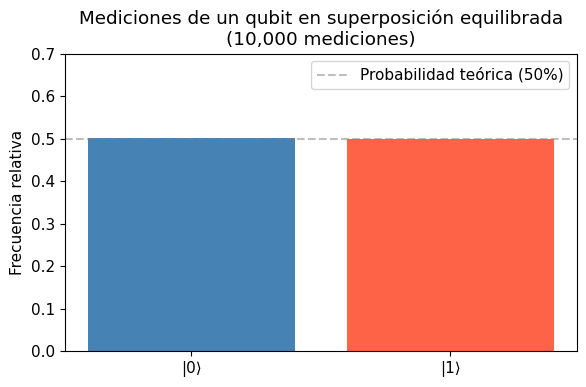

In [40]:
# Simular mediciones de un qubit

def medir_qubit(estado, n_mediciones=1000):
    """Simula n_mediciones de un qubit."""
    prob_0 = abs(estado[0])**2
    resultados = np.random.choice([0, 1], size=n_mediciones, p=[prob_0, 1-prob_0])
    return resultados

# Medir el estado en superposición equilibrada
resultados = medir_qubit(psi_plus, 10000)

print("=== SIMULACIÓN DE MEDICIONES ===")
print(f"Estado: |ψ⟩ = (1/√2)|0⟩ + (1/√2)|1⟩")
print(f"Mediciones realizadas: 10,000")
print(f"\nResultados:")
print(f"  |0⟩ medido: {np.sum(resultados == 0)} veces ({np.mean(resultados == 0):.1%})")
print(f"  |1⟩ medido: {np.sum(resultados == 1)} veces ({np.mean(resultados == 1):.1%})")

# Histograma
plt.figure(figsize=(6, 4))
plt.bar(['|0⟩', '|1⟩'], [np.mean(resultados==0), np.mean(resultados==1)], color=['steelblue', 'tomato'])
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Probabilidad teórica (50%)')
plt.ylabel('Frecuencia relativa')
plt.title('Mediciones de un qubit en superposición equilibrada\n(10,000 mediciones)')
plt.legend()
plt.ylim(0, 0.7)
plt.tight_layout()
plt.show()

## **16. Puertas cuánticas: matrices que transforman qubits**

Las **puertas cuánticas** son el equivalente cuántico de las operaciones lógicas. Matemáticamente son **matrices unitarias** que actúan sobre vectores de estado.

En lenguaje de tensores: el **estado del qubit** es un tensor de orden 1 (vector), la **puerta cuántica** es un tensor de orden 2 (matriz), y **aplicar una puerta** es realizar una multiplicación matriz × vector.

### Puerta X (NOT cuántico)

$$
X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
$$

Intercambia los estados base: $X|0\rangle = |1\rangle$ y $X|1\rangle = |0\rangle$.

### Puerta Hadamard (H) — la más importante

$$
H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}
$$

Crea **superposición** a partir de un estado puro:

$$
H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \qquad
H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
$$

> Es la puerta que convierte un qubit "decidido" en uno "indeciso".
> Fundamental para aprovechar el paralelismo cuántico.

### Puerta de fase (S)

$$
S = \begin{pmatrix} 1 & 0 \\ 0 & i \end{pmatrix}
$$

Añade una **fase compleja** al estado $|1\rangle$: $S|1\rangle = i|1\rangle$.

No cambia las probabilidades de medición, pero sí la **fase**, lo cual afecta interferencias posteriores (la fase es invisible al medir, pero crucial para los cálculos intermedios).

### Resumen tensorial

Todas estas puertas son **matrices 2×2** (tensores de orden 2) que transforman **vectores de 2 componentes** (tensores de orden 1). La operación es siempre una multiplicación matriz-vector.


### Práctica: Sección 16

In [41]:
# Definir las puertas cuánticas básicas

# Puerta X (NOT cuántico): intercambia |0⟩ y |1⟩
X = np.array([[0, 1],
              [1, 0]], dtype=complex)

# Puerta Hadamard (H): crea superposición
H = (1/np.sqrt(2)) * np.array([[1,  1],
                                [1, -1]], dtype=complex)

# Puerta de fase (S)
S = np.array([[1, 0],
              [0, 1j]], dtype=complex)

# Puerta Z: cambia la fase de |1⟩
Z = np.array([[1,  0],
              [0, -1]], dtype=complex)

# Identidad
I = np.eye(2, dtype=complex)

print("=== PUERTAS CUÁNTICAS ===")
print(f"Todas son matrices 2×2 (tensores de orden 2)\n")

puertas = {'X (NOT)': X, 'H (Hadamard)': H, 'S (Fase)': S, 'Z': Z, 'I (Identidad)': I}
for nombre, puerta in puertas.items():
    print(f"{nombre}:")
    print(puerta)
    print()

=== PUERTAS CUÁNTICAS ===
Todas son matrices 2×2 (tensores de orden 2)

X (NOT):
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

H (Hadamard):
[[ 0.7071+0.j  0.7071+0.j]
 [ 0.7071+0.j -0.7071+0.j]]

S (Fase):
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j]]

Z:
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]

I (Identidad):
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]



In [42]:
# Aplicar puertas a qubits

print("=== PUERTA X (NOT) ===")
print(f"X|0⟩ = {X @ ket_0}  →  |1⟩")
print(f"X|1⟩ = {X @ ket_1}  →  |0⟩")
print("Intercambia los estados base.")
print()

print("=== PUERTA HADAMARD ===")
h0 = H @ ket_0
h1 = H @ ket_1
print(f"H|0⟩ = {h0}")
print(f"     = (1/√2)(|0⟩ + |1⟩)  →  superposición equilibrada")
print(f"     P(0) = {abs(h0[0])**2:.0%}, P(1) = {abs(h0[1])**2:.0%}")
print()
print(f"H|1⟩ = {h1}")
print(f"     = (1/√2)(|0⟩ - |1⟩)  →  superposición con fase negativa")
print(f"     P(0) = {abs(h1[0])**2:.0%}, P(1) = {abs(h1[1])**2:.0%}")
print()

print("=== PUERTA DE FASE (S) ===")
print(f"S|0⟩ = {S @ ket_0}  →  |0⟩ (sin cambio)")
print(f"S|1⟩ = {S @ ket_1}  →  i|1⟩ (fase compleja)")
print("No cambia las probabilidades, pero sí la fase.")

=== PUERTA X (NOT) ===
X|0⟩ = [0.+0.j 1.+0.j]  →  |1⟩
X|1⟩ = [1.+0.j 0.+0.j]  →  |0⟩
Intercambia los estados base.

=== PUERTA HADAMARD ===
H|0⟩ = [0.7071+0.j 0.7071+0.j]
     = (1/√2)(|0⟩ + |1⟩)  →  superposición equilibrada
     P(0) = 50%, P(1) = 50%

H|1⟩ = [ 0.7071+0.j -0.7071+0.j]
     = (1/√2)(|0⟩ - |1⟩)  →  superposición con fase negativa
     P(0) = 50%, P(1) = 50%

=== PUERTA DE FASE (S) ===
S|0⟩ = [1.+0.j 0.+0.j]  →  |0⟩ (sin cambio)
S|1⟩ = [0.+0.j 0.+1.j]  →  i|1⟩ (fase compleja)
No cambia las probabilidades, pero sí la fase.


In [43]:
# Propiedad importante: H aplicado dos veces = Identidad

print("=== PROPIEDAD: H·H = I ===")
print(f"H·H:")
print(H @ H)
print()
print(f"H|0⟩      = {H @ ket_0}")
print(f"H(H|0⟩)   = {H @ (H @ ket_0)}  →  volvemos a |0⟩")
print()
print("Aplicar Hadamard dos veces devuelve al estado original.")
print("Esto es clave para el algoritmo Deutsch-Jozsa.")

=== PROPIEDAD: H·H = I ===
H·H:
[[ 1.+0.j -0.+0.j]
 [-0.+0.j  1.+0.j]]

H|0⟩      = [0.7071+0.j 0.7071+0.j]
H(H|0⟩)   = [1.+0.j 0.+0.j]  →  volvemos a |0⟩

Aplicar Hadamard dos veces devuelve al estado original.
Esto es clave para el algoritmo Deutsch-Jozsa.


## **17. Múltiples qubits: el producto tensorial**

Cuando pasamos de 1 qubit a varios, el espacio de estados crece **exponencialmente**.

### Sistema de 2 qubits

Los estados base posibles son todas las combinaciones:

$$
|00\rangle, \quad |01\rangle, \quad |10\rangle, \quad |11\rangle
$$

El estado general es una superposición de todos ellos:

$$
|\psi\rangle = \alpha_{00}|00\rangle + \alpha_{01}|01\rangle + \alpha_{10}|10\rangle + \alpha_{11}|11\rangle
$$

Como vector, necesitamos **4 componentes** (porque $2^2 = 4$):

$$
|\psi\rangle =
\begin{pmatrix}
\alpha_{00} \\
\alpha_{01} \\
\alpha_{10} \\
\alpha_{11}
\end{pmatrix}
$$

### ¿Cómo combinamos qubits individuales?

Usando el **producto tensorial** $\otimes$. Si tenemos dos qubits separados:

$$
|\psi_1\rangle =
\begin{pmatrix} \alpha \\ \beta \end{pmatrix}
\qquad
|\psi_2\rangle =
\begin{pmatrix} \gamma \\ \delta \end{pmatrix}
$$

Su producto tensorial combina **todas las posibilidades**:

$$
|\psi_1\rangle \otimes |\psi_2\rangle =
\begin{pmatrix}
\alpha \cdot \gamma \\
\alpha \cdot \delta \\
\beta \cdot \gamma \\
\beta \cdot \delta
\end{pmatrix}
$$

### Ejemplo concreto

$$
|0\rangle \otimes |1\rangle =
\begin{pmatrix} 1 \\ 0 \end{pmatrix}
\otimes
\begin{pmatrix} 0 \\ 1 \end{pmatrix}
=
\begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}
= |01\rangle
$$

### Crecimiento exponencial

| Qubits | Componentes del vector de estado | Equivalencia |
|--------|----------------------------------|--------------|
| 1 | 2 | $2^1$ |
| 2 | 4 | $2^2$ |
| 3 | 8 | $2^3$ |
| 10 | 1,024 | $2^{10}$ |
| 20 | 1,048,576 | $2^{20}$ |
| 50 | ~$10^{15}$ | Más que la RAM de cualquier supercomputadora |

> Cada qubit adicional **duplica** el tamaño del tensor.
> Un sistema de 50 qubits requiere un vector con más de un cuatrillón de componentes complejas.
> Esta es la razón por la que simular computadoras cuánticas en computadoras clásicas es tan difícil.


### Práctica: Sección 17

In [44]:
# Producto tensorial con np.kron (producto de Kronecker)

print("=== PRODUCTO TENSORIAL ===")
print()

# |0⟩ ⊗ |0⟩ = |00⟩
ket_00 = np.kron(ket_0, ket_0)
print(f"|0⟩ ⊗ |0⟩ = {ket_00}  →  |00⟩")

# |0⟩ ⊗ |1⟩ = |01⟩
ket_01 = np.kron(ket_0, ket_1)
print(f"|0⟩ ⊗ |1⟩ = {ket_01}  →  |01⟩")

# |1⟩ ⊗ |0⟩ = |10⟩
ket_10 = np.kron(ket_1, ket_0)
print(f"|1⟩ ⊗ |0⟩ = {ket_10}  →  |10⟩")

# |1⟩ ⊗ |1⟩ = |11⟩
ket_11 = np.kron(ket_1, ket_1)
print(f"|1⟩ ⊗ |1⟩ = {ket_11}  →  |11⟩")

print(f"\nCada estado base de 2 qubits tiene 4 componentes (2² = 4)")
print(f"Shape: {ket_00.shape}")

=== PRODUCTO TENSORIAL ===

|0⟩ ⊗ |0⟩ = [1.+0.j 0.+0.j 0.+0.j 0.+0.j]  →  |00⟩
|0⟩ ⊗ |1⟩ = [0.+0.j 1.+0.j 0.+0.j 0.+0.j]  →  |01⟩
|1⟩ ⊗ |0⟩ = [0.+0.j 0.+0.j 1.+0.j 0.+0.j]  →  |10⟩
|1⟩ ⊗ |1⟩ = [0.+0.j 0.+0.j 0.+0.j 1.+0.j]  →  |11⟩

Cada estado base de 2 qubits tiene 4 componentes (2² = 4)
Shape: (4,)


In [45]:
# Superposición de dos qubits

# |+⟩ = (1/√2)(|0⟩ + |1⟩)
ket_plus = H @ ket_0

# |+⟩ ⊗ |0⟩
estado_2q = np.kron(ket_plus, ket_0)

print("=== SUPERPOSICIÓN DE 2 QUBITS ===")
print(f"|+⟩ ⊗ |0⟩ = {estado_2q}")
print()
print("Probabilidades:")
etiquetas = ['|00⟩', '|01⟩', '|10⟩', '|11⟩']
for i, (et, amp) in enumerate(zip(etiquetas, estado_2q)):
    prob = abs(amp)**2
    print(f"  P({et}) = |{amp:.4f}|² = {prob:.4f} = {prob:.0%}")
print(f"\nSuma: {sum(abs(a)**2 for a in estado_2q):.4f}")

=== SUPERPOSICIÓN DE 2 QUBITS ===
|+⟩ ⊗ |0⟩ = [0.7071+0.j 0.    +0.j 0.7071+0.j 0.    +0.j]

Probabilidades:
  P(|00⟩) = |0.7071+0.0000j|² = 0.5000 = 50%
  P(|01⟩) = |0.0000+0.0000j|² = 0.0000 = 0%
  P(|10⟩) = |0.7071+0.0000j|² = 0.5000 = 50%
  P(|11⟩) = |0.0000+0.0000j|² = 0.0000 = 0%

Suma: 1.0000


In [46]:
# Crecimiento exponencial del espacio de estados

print("=== CRECIMIENTO EXPONENCIAL ===")
print(f"\n{'Qubits':>6}  {'Componentes':>12}  {'Memoria (bytes)':>16}")
print("-" * 40)

for n in [1, 2, 3, 5, 10, 20, 30, 40, 50]:
    componentes = 2**n
    memoria = componentes * 16  # 16 bytes por número complejo (complex128)
    if memoria < 1e3:
        mem_str = f"{memoria} B"
    elif memoria < 1e6:
        mem_str = f"{memoria/1e3:.1f} KB"
    elif memoria < 1e9:
        mem_str = f"{memoria/1e6:.1f} MB"
    elif memoria < 1e12:
        mem_str = f"{memoria/1e9:.1f} GB"
    elif memoria < 1e15:
        mem_str = f"{memoria/1e12:.1f} TB"
    else:
        mem_str = f"{memoria/1e15:.1f} PB"
    print(f"{n:>6}  {componentes:>12,}  {mem_str:>16}")

print("\nSimular 50 qubits requiere más memoria que cualquier supercomputadora.")

=== CRECIMIENTO EXPONENCIAL ===

Qubits   Componentes   Memoria (bytes)
----------------------------------------
     1             2              32 B
     2             4              64 B
     3             8             128 B
     5            32             512 B
    10         1,024           16.4 KB
    20     1,048,576           16.8 MB
    30  1,073,741,824           17.2 GB
    40  1,099,511,627,776           17.6 TB
    50  1,125,899,906,842,624           18.0 PB

Simular 50 qubits requiere más memoria que cualquier supercomputadora.


## **18. Entrelazamiento cuántico**

En sistemas de múltiples qubits, a veces los qubits **no pueden describirse por separado**. Esto se llama **entrelazamiento cuántico**.

### Estado separable (NO entrelazado)

Si podemos escribir un estado como producto de qubits individuales, es separable:

$$
|\psi\rangle = |0\rangle \otimes \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$

Cada qubit puede describirse de forma independiente. El tensor del sistema se factoriza.

### Estado entrelazado: el par de Bell

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

**Pregunta:** ¿Se puede escribir como $|\psi_1\rangle \otimes |\psi_2\rangle$?

Intentemos:

$$
(\alpha|0\rangle + \beta|1\rangle) \otimes (\gamma|0\rangle + \delta|1\rangle) = \alpha\gamma|00\rangle + \alpha\delta|01\rangle + \beta\gamma|10\rangle + \beta\delta|11\rangle
$$

Para igualar con $|\Phi^+\rangle$ necesitamos:

$$
\alpha\gamma = \frac{1}{\sqrt{2}}, \quad
\alpha\delta = 0, \quad
\beta\gamma = 0, \quad
\beta\delta = \frac{1}{\sqrt{2}}
$$

**Contradicción:** Si $\alpha\gamma \neq 0$, entonces $\alpha \neq 0$ y $\gamma \neq 0$. Pero $\alpha\delta = 0$ con $\alpha \neq 0$ implica $\delta = 0$. Entonces $\beta\delta = 0 \neq \frac{1}{\sqrt{2}}$.

**No tiene solución.** El estado de Bell es un **tensor irreducible**: no se puede descomponer en partes independientes.

### Consecuencia física

- Si mides el **primer qubit** y obtienes 0, **automáticamente** sabes que el segundo también es 0.
- Esto ocurre **instantáneamente**, sin importar la distancia entre los qubits.
- Einstein llamó a esto *"acción fantasmal a distancia"* (*spooky action at a distance*).

> **Conexión tensorial:** El entrelazamiento es un fenómeno **intrínseco a la estructura tensorial**
> de los sistemas cuánticos. Un estado entrelazado es un tensor de orden superior
> que no se puede factorizar como producto de tensores de orden inferior.


### Práctica: Sección 18

In [47]:
# Estado separable (NO entrelazado)

sep = np.kron(ket_plus, ket_0)  # |+⟩ ⊗ |0⟩

print("=== ESTADO SEPARABLE ===")
print(f"|+⟩ ⊗ |0⟩ = (1/√2)(|00⟩ + |10⟩)")
print(f"Estado: {sep}")
print()
print("Probabilidades:")
for et, amp in zip(etiquetas, sep):
    print(f"  P({et}) = {abs(amp)**2:.2f}")
print("\nEste estado SE PUEDE factorizar como producto de qubits individuales.")

=== ESTADO SEPARABLE ===
|+⟩ ⊗ |0⟩ = (1/√2)(|00⟩ + |10⟩)
Estado: [0.7071+0.j 0.    +0.j 0.7071+0.j 0.    +0.j]

Probabilidades:
  P(|00⟩) = 0.50
  P(|01⟩) = 0.00
  P(|10⟩) = 0.50
  P(|11⟩) = 0.00

Este estado SE PUEDE factorizar como producto de qubits individuales.


In [48]:
# Estado entrelazado: Par de Bell |Φ+⟩ = (1/√2)(|00⟩ + |11⟩)

bell = (1/np.sqrt(2)) * (ket_00 + ket_11)

print("=== ESTADO ENTRELAZADO (PAR DE BELL) ===")
print(f"|Φ+⟩ = (1/√2)(|00⟩ + |11⟩)")
print(f"Estado: {bell}")
print()
print("Probabilidades:")
for et, amp in zip(etiquetas, bell):
    print(f"  P({et}) = {abs(amp)**2:.2f}")
print()
print("Solo |00⟩ y |11⟩ son posibles.")
print("Si mides el primer qubit y obtienes 0, el segundo SIEMPRE será 0.")
print("Si mides el primer qubit y obtienes 1, el segundo SIEMPRE será 1.")
print("\nEste estado NO se puede factorizar como producto de qubits individuales.")

=== ESTADO ENTRELAZADO (PAR DE BELL) ===
|Φ+⟩ = (1/√2)(|00⟩ + |11⟩)
Estado: [0.7071+0.j 0.    +0.j 0.    +0.j 0.7071+0.j]

Probabilidades:
  P(|00⟩) = 0.50
  P(|01⟩) = 0.00
  P(|10⟩) = 0.00
  P(|11⟩) = 0.50

Solo |00⟩ y |11⟩ son posibles.
Si mides el primer qubit y obtienes 0, el segundo SIEMPRE será 0.
Si mides el primer qubit y obtienes 1, el segundo SIEMPRE será 1.

Este estado NO se puede factorizar como producto de qubits individuales.


In [49]:
# Demostración: ¿por qué no se puede factorizar?

print("=== DEMOSTRACIÓN: BELL NO ES FACTORIZABLE ===")
print()
print("Si |Φ+⟩ = (α|0⟩+β|1⟩) ⊗ (γ|0⟩+δ|1⟩), entonces:")
print("  αγ = 1/√2  (coef. de |00⟩)")
print("  αδ = 0      (coef. de |01⟩)")
print("  βγ = 0      (coef. de |10⟩)")
print("  βδ = 1/√2  (coef. de |11⟩)")
print()
print("De αγ ≠ 0 → α ≠ 0 y γ ≠ 0")
print("De αδ = 0  con α ≠ 0 → δ = 0")
print("Pero βδ = 1/√2 requiere δ ≠ 0  ← CONTRADICCIÓN")
print()

# Verificación numérica: buscar la mejor factorización
print("Verificación numérica: intentando factorizar...")
mejor_error = float('inf')
for _ in range(10000):
    # Generar qubits aleatorios normalizados
    a, b = np.random.randn(2) + 1j*np.random.randn(2)
    norma = np.sqrt(abs(a)**2 + abs(b)**2)
    a, b = a/norma, b/norma

    c, d = np.random.randn(2) + 1j*np.random.randn(2)
    norma = np.sqrt(abs(c)**2 + abs(d)**2)
    c, d = c/norma, d/norma

    producto = np.kron(np.array([a, b]), np.array([c, d]))
    error = np.linalg.norm(producto - bell)
    mejor_error = min(mejor_error, error)

print(f"Mejor aproximación tras 10,000 intentos: error = {mejor_error:.4f}")
print(f"Error > 0 confirma: NO se puede factorizar. Es un tensor irreducible.")

=== DEMOSTRACIÓN: BELL NO ES FACTORIZABLE ===

Si |Φ+⟩ = (α|0⟩+β|1⟩) ⊗ (γ|0⟩+δ|1⟩), entonces:
  αγ = 1/√2  (coef. de |00⟩)
  αδ = 0      (coef. de |01⟩)
  βγ = 0      (coef. de |10⟩)
  βδ = 1/√2  (coef. de |11⟩)

De αγ ≠ 0 → α ≠ 0 y γ ≠ 0
De αδ = 0  con α ≠ 0 → δ = 0
Pero βδ = 1/√2 requiere δ ≠ 0  ← CONTRADICCIÓN

Verificación numérica: intentando factorizar...
Mejor aproximación tras 10,000 intentos: error = 0.7662
Error > 0 confirma: NO se puede factorizar. Es un tensor irreducible.


=== MEDICIONES DEL PAR DE BELL ===
Estado: |Φ+⟩ = (1/√2)(|00⟩ + |11⟩)
Mediciones: 10,000

  |00⟩:  4879 veces  (48.8%)
  |01⟩:     0 veces  (0.0%)
  |10⟩:     0 veces  (0.0%)
  |11⟩:  5121 veces  (51.2%)

Correlación perfecta: solo se observan |00⟩ y |11⟩.
Los qubits SIEMPRE coinciden.


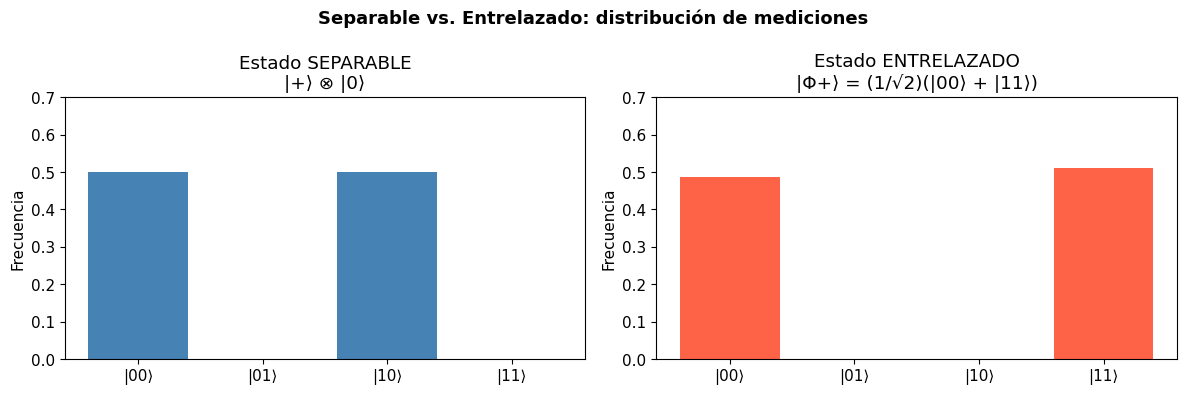

In [50]:
# Simular mediciones del par de Bell

def medir_2qubits(estado, n_mediciones=10000):
    """Simula mediciones de un estado de 2 qubits."""
    probs = np.abs(estado)**2
    indices = np.random.choice(4, size=n_mediciones, p=probs)
    return indices

resultados_bell = medir_2qubits(bell, 10000)

print("=== MEDICIONES DEL PAR DE BELL ===")
print(f"Estado: |Φ+⟩ = (1/√2)(|00⟩ + |11⟩)")
print(f"Mediciones: 10,000\n")

for i, et in enumerate(etiquetas):
    count = np.sum(resultados_bell == i)
    print(f"  {et}: {count:>5} veces  ({count/10000:.1%})")

print(f"\nCorrelación perfecta: solo se observan |00⟩ y |11⟩.")
print(f"Los qubits SIEMPRE coinciden.")

# Visualizar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Separable
res_sep = medir_2qubits(sep, 10000)
counts_sep = [np.sum(res_sep == i)/10000 for i in range(4)]
ax1.bar(etiquetas, counts_sep, color=['steelblue', 'lightgray', 'steelblue', 'lightgray'])
ax1.set_title('Estado SEPARABLE\n|+⟩ ⊗ |0⟩')
ax1.set_ylabel('Frecuencia')
ax1.set_ylim(0, 0.7)

# Entrelazado
counts_bell = [np.sum(resultados_bell == i)/10000 for i in range(4)]
ax2.bar(etiquetas, counts_bell, color=['tomato', 'lightgray', 'lightgray', 'tomato'])
ax2.set_title('Estado ENTRELAZADO\n|Φ+⟩ = (1/√2)(|00⟩ + |11⟩)')
ax2.set_ylabel('Frecuencia')
ax2.set_ylim(0, 0.7)

fig.suptitle('Separable vs. Entrelazado: distribución de mediciones', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

## **19. Puertas en sistemas multi-qubit**

### Puerta CNOT (Controlled-NOT)

Actúa sobre **2 qubits**: uno de control y uno objetivo. Si el qubit de control es |0⟩, no hace nada al objetivo. Si el qubit de control es |1⟩, aplica NOT al objetivo.

**Matriz CNOT** (4×4, porque actúa sobre 2 qubits = 4 estados base):

$$
\text{CNOT} =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
$$

| Entrada | Salida | ¿Qué pasó? |
|---------|--------|-----------|
| $\|00\rangle$ | $\|00\rangle$ | Control=0, no cambia nada |
| $\|01\rangle$ | $\|01\rangle$ | Control=0, no cambia nada |
| $\|10\rangle$ | $\|11\rangle$ | Control=1, invierte el objetivo: 0→1 |
| $\|11\rangle$ | $\|10\rangle$ | Control=1, invierte el objetivo: 1→0 |

### Creando entrelazamiento con H + CNOT

Partiendo del estado inicial |00⟩, se aplica Hadamard al primer qubit para crear superposición: (1/√2)(|00⟩ + |10⟩). Luego se aplica CNOT, que produce el par de Bell: (1/√2)(|00⟩ + |11⟩). Con solo **dos puertas** (dos tensores de orden 2) hemos creado un estado entrelazado a partir de un estado separable.

### Estado de múltiples qubits como tensor de orden n

Un sistema de 3 qubits tiene un estado:

$$
|\psi\rangle = \sum_{i,j,k \in \{0,1\}} \alpha_{ijk} |ijk\rangle
$$

Los coeficientes $\alpha_{ijk}$ forman un **tensor 3D** (un cubo de $2 \times 2 \times 2 = 8$ números complejos). Cada índice corresponde a un qubit.

> **Analogía con ML:** así como un tensor 3D de imágenes tiene dimensiones alto × ancho × canales,
> un tensor cuántico de 3 qubits tiene dimensiones qubit1 × qubit2 × qubit3.

### Operaciones tensoriales cuánticas — paralelo con ML

| Operación | En ML (NumPy) | En Cuántica |
|---|---|---|
| Combinar subsistemas | Concatenar arrays | Producto tensorial $\otimes$ |
| Transformar datos | Multiplicación matricial | Multiplicar por puerta cuántica |
| Reducir dimensiones | Suma a lo largo de un eje | Traza parcial |
| Tipo de números | Reales | Complejos |


### Práctica: Sección 19

In [51]:
# Puerta CNOT (Controlled-NOT)

CNOT = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0]
], dtype=complex)

print("=== PUERTA CNOT ===")
print(f"Matriz CNOT (4×4, tensor de orden 2):\n{CNOT.real.astype(int)}")
print()
print("Comportamiento:")
for entrada, nombre_in in [(ket_00, '|00⟩'), (ket_01, '|01⟩'), (ket_10, '|10⟩'), (ket_11, '|11⟩')]:
    salida = CNOT @ entrada
    # Encontrar cuál estado base es
    for i, et in enumerate(etiquetas):
        if abs(salida[i]) > 0.9:
            nombre_out = et
    print(f"  CNOT{nombre_in} = {nombre_out}")

=== PUERTA CNOT ===
Matriz CNOT (4×4, tensor de orden 2):
[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]

Comportamiento:
  CNOT|00⟩ = |00⟩
  CNOT|01⟩ = |01⟩
  CNOT|10⟩ = |11⟩
  CNOT|11⟩ = |10⟩


In [52]:
# Crear un par de Bell usando H + CNOT

print("=== CREANDO UN PAR DE BELL ===")
print()

# Paso 1: Estado inicial |00⟩
estado = ket_00.copy()
print(f"Paso 1 │ Estado inicial |00⟩:          {estado}")

# Paso 2: Hadamard al primer qubit → H ⊗ I
HxI = np.kron(H, I)  # Hadamard en qubit 1, Identidad en qubit 2
estado = HxI @ estado
print(f"Paso 2 │ Hadamard al qubit 1 (H⊗I):   {estado}")
print(f"        │ = (1/√2)(|00⟩ + |10⟩)")

# Paso 3: CNOT
estado = CNOT @ estado
print(f"Paso 3 │ CNOT:                         {estado}")
print(f"        │ = (1/√2)(|00⟩ + |11⟩)  ← PAR DE BELL")

# Verificar
print(f"\nVerificación:")
print(f"  ¿Es igual a |Φ+⟩? {np.allclose(estado, bell)}")
print(f"  Probabilidades: {np.abs(estado)**2}")

=== CREANDO UN PAR DE BELL ===

Paso 1 │ Estado inicial |00⟩:          [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
Paso 2 │ Hadamard al qubit 1 (H⊗I):   [0.7071+0.j 0.    +0.j 0.7071+0.j 0.    +0.j]
        │ = (1/√2)(|00⟩ + |10⟩)
Paso 3 │ CNOT:                         [0.7071+0.j 0.    +0.j 0.    +0.j 0.7071+0.j]
        │ = (1/√2)(|00⟩ + |11⟩)  ← PAR DE BELL

Verificación:
  ¿Es igual a |Φ+⟩? True
  Probabilidades: [0.5 0.  0.  0.5]


In [53]:
# 3 qubits: tensor con 8 componentes

print("=== SISTEMA DE 3 QUBITS ===")
print()

# Estado |000⟩
ket_000 = np.kron(np.kron(ket_0, ket_0), ket_0)
print(f"|000⟩ = {ket_000}")
print(f"Shape: {ket_000.shape}  →  2³ = 8 componentes")

# Aplicar Hadamard a los 3 qubits → superposición total
HxHxH = np.kron(np.kron(H, H), H)
superposicion_3q = HxHxH @ ket_000

print(f"\nAplicar H⊗H⊗H a |000⟩:")
etiquetas_3q = [f'|{i}{j}{k}⟩' for i in '01' for j in '01' for k in '01']
for et, amp in zip(etiquetas_3q, superposicion_3q):
    print(f"  {et}: amplitud = {amp.real:+.4f}, P = {abs(amp)**2:.4f}")

print(f"\nSuma de probabilidades: {sum(abs(a)**2 for a in superposicion_3q):.4f}")
print(f"Todos los estados son equiprobables: 1/8 = {1/8:.4f} cada uno.")

=== SISTEMA DE 3 QUBITS ===

|000⟩ = [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Shape: (8,)  →  2³ = 8 componentes

Aplicar H⊗H⊗H a |000⟩:
  |000⟩: amplitud = +0.3536, P = 0.1250
  |001⟩: amplitud = +0.3536, P = 0.1250
  |010⟩: amplitud = +0.3536, P = 0.1250
  |011⟩: amplitud = +0.3536, P = 0.1250
  |100⟩: amplitud = +0.3536, P = 0.1250
  |101⟩: amplitud = +0.3536, P = 0.1250
  |110⟩: amplitud = +0.3536, P = 0.1250
  |111⟩: amplitud = +0.3536, P = 0.1250

Suma de probabilidades: 1.0000
Todos los estados son equiprobables: 1/8 = 0.1250 cada uno.


## **20. Ejemplo: algoritmo de Deutsch-Jozsa**

Un ejemplo concreto de cómo los tensores cuánticos resuelven un problema más rápido que los métodos clásicos.

### El problema

Tienes una función $f: \{0,1\} \to \{0,1\}$ que puede ser:

- **Constante:** siempre devuelve 0, o siempre devuelve 1.
- **Balanceada:** devuelve 0 la mitad de las veces y 1 la otra mitad.

**Objetivo:** determinar si $f$ es constante o balanceada. Clásicamente se necesitan 2 evaluaciones; cuánticamente basta con 1 sola.

### Paso a paso tensorial

**Paso 1 — Inicializar:**
$$|\psi_0\rangle = |0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$$

Tensor de orden 1, 2 componentes.

**Paso 2 — Hadamard (crear superposición):**
$$|\psi_1\rangle = H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$

Ahora el qubit "explora" ambos valores simultáneamente.

**Paso 3 — Aplicar el oráculo $U_f$:**
$U_f$ evalúa $f(0)$ y $f(1)$ **al mismo tiempo** gracias a la superposición. No colapsa el estado, sino que codifica la respuesta en las fases del vector.

**Paso 4 — Segunda Hadamard:**
$$|\psi_3\rangle = H|\psi_2\rangle$$

La interferencia cuántica hace que las amplitudes se sumen o cancelen:
- Si $f$ es constante → las amplitudes se refuerzan hacia $|0\rangle$.
- Si $f$ es balanceada → las amplitudes se refuerzan hacia $|1\rangle$.

**Paso 5 — Medición:**
$$
\text{Si medimos } |0\rangle \Rightarrow f \text{ es constante} \qquad
\text{Si medimos } |1\rangle \Rightarrow f \text{ es balanceada}
$$

Una **sola medición** basta, porque las transformaciones tensoriales (Hadamard, oráculo, Hadamard) dirigieron el estado hacia la respuesta correcta.

### Conexión tensorial

- Cada paso es una **multiplicación de un tensor de orden 2 (puerta) por un tensor de orden 1 (estado)**.
- La superposición permite operar sobre todos los valores de entrada al mismo tiempo.
- La interferencia (constructiva o destructiva) es consecuencia directa de las **propiedades lineales de los tensores**: sumar y restar componentes complejas.


### Práctica: Sección 20

In [54]:
# Algoritmo de Deutsch-Jozsa (versión simplificada de 1 qubit)

def deutsch_jozsa(f_tipo):
    """
    Simula el algoritmo de Deutsch-Jozsa.
    f_tipo: 'constante_0', 'constante_1', 'balanceada_id', 'balanceada_not'
    """
    print(f"\n{'='*50}")
    print(f"Función: {f_tipo}")
    print(f"{'='*50}")

    # Definir el oráculo Uf como una matriz 2×2
    if f_tipo == 'constante_0':      # f(x) = 0 para todo x
        Uf = I.copy()                # No hace nada (fase = 0)
    elif f_tipo == 'constante_1':    # f(x) = 1 para todo x
        Uf = -I.copy()               # Fase global -1
    elif f_tipo == 'balanceada_id':  # f(x) = x
        Uf = Z.copy()                # Cambia fase de |1⟩
    elif f_tipo == 'balanceada_not': # f(x) = NOT(x)
        Uf = -Z.copy()               # Cambia fase de |0⟩

    # Paso 1: Inicializar |0⟩
    psi = ket_0.copy()
    print(f"Paso 1 │ |ψ₀⟩ = {psi}")

    # Paso 2: Hadamard → superposición
    psi = H @ psi
    print(f"Paso 2 │ H|ψ₀⟩ = {psi}  (superposición)")

    # Paso 3: Aplicar oráculo
    psi = Uf @ psi
    print(f"Paso 3 │ Uf·|ψ₁⟩ = {psi}  (oráculo aplicado)")

    # Paso 4: Hadamard de nuevo → interferencia
    psi = H @ psi
    print(f"Paso 4 │ H·|ψ₂⟩ = {psi}  (interferencia)")

    # Paso 5: Medir
    prob_0 = abs(psi[0])**2
    prob_1 = abs(psi[1])**2
    resultado = 0 if prob_0 > 0.5 else 1
    tipo = "CONSTANTE" if resultado == 0 else "BALANCEADA"

    print(f"Paso 5 │ P(|0⟩) = {prob_0:.4f}, P(|1⟩) = {prob_1:.4f}")
    print(f"       │ Medimos: |{resultado}⟩ → f es {tipo}")

    return tipo

# Probar con las 4 funciones posibles
for f in ['constante_0', 'constante_1', 'balanceada_id', 'balanceada_not']:
    deutsch_jozsa(f)


Función: constante_0
Paso 1 │ |ψ₀⟩ = [1.+0.j 0.+0.j]
Paso 2 │ H|ψ₀⟩ = [0.7071+0.j 0.7071+0.j]  (superposición)
Paso 3 │ Uf·|ψ₁⟩ = [0.7071+0.j 0.7071+0.j]  (oráculo aplicado)
Paso 4 │ H·|ψ₂⟩ = [1.+0.j 0.+0.j]  (interferencia)
Paso 5 │ P(|0⟩) = 1.0000, P(|1⟩) = 0.0000
       │ Medimos: |0⟩ → f es CONSTANTE

Función: constante_1
Paso 1 │ |ψ₀⟩ = [1.+0.j 0.+0.j]
Paso 2 │ H|ψ₀⟩ = [0.7071+0.j 0.7071+0.j]  (superposición)
Paso 3 │ Uf·|ψ₁⟩ = [-0.7071+0.j -0.7071+0.j]  (oráculo aplicado)
Paso 4 │ H·|ψ₂⟩ = [-1.+0.j  0.+0.j]  (interferencia)
Paso 5 │ P(|0⟩) = 1.0000, P(|1⟩) = 0.0000
       │ Medimos: |0⟩ → f es CONSTANTE

Función: balanceada_id
Paso 1 │ |ψ₀⟩ = [1.+0.j 0.+0.j]
Paso 2 │ H|ψ₀⟩ = [0.7071+0.j 0.7071+0.j]  (superposición)
Paso 3 │ Uf·|ψ₁⟩ = [ 0.7071+0.j -0.7071+0.j]  (oráculo aplicado)
Paso 4 │ H·|ψ₂⟩ = [0.+0.j 1.+0.j]  (interferencia)
Paso 5 │ P(|0⟩) = 0.0000, P(|1⟩) = 1.0000
       │ Medimos: |1⟩ → f es BALANCEADA

Función: balanceada_not
Paso 1 │ |ψ₀⟩ = [1.+0.j 0.+0.j]
Paso 2 │ H|ψ₀

### Deutsch-Jozsa: clásico vs cuántico

| | Clásico | Cuántico |
|---|---|---|
| **Paso 1** | Evaluar f(0) → un resultado | Hadamard → superposición |
| **Paso 2** | Evaluar f(1) → otro resultado | 1 evaluación de f (sobre la superposición) |
| **Paso 3** | Comparar ambos resultados | Hadamard → interferencia |
| **Resultado** | 2 evaluaciones necesarias | 1 sola evaluación basta |

> **Ventaja cuántica:** el producto tensorial permite evaluar f(0) y f(1)
> **simultáneamente** gracias a la superposición.

# **Conclusión**

1. Los **tensores** son herramientas universales para representar relaciones entre direcciones, dimensiones o subsistemas.

2. En **física**, siguen reglas de transformación estrictas y describen magnitudes que existen independientemente del observador.

3. En **machine learning**, son contenedores multidimensionales que permiten operaciones masivas en paralelo, impulsando el entrenamiento de redes neuronales.

4. En **computación cuántica**, los tensores son la estructura fundamental: los estados son vectores complejos, las operaciones son matrices unitarias, y el entrelazamiento es la manifestación de tensores irreducibles.

5. La **dimensión y el orden** indican la complejidad de las relaciones: mientras más alto el orden, más rica la estructura que el tensor puede capturar.

> El hilo conductor es siempre el mismo: **organizar información multidimensional
> de forma estructurada y transformarla según reglas matemáticas precisas**.
> Eso es, en esencia, lo que hace un tensor.


### **Mapa comparativo: tensores en tres mundos**

| Aspecto | Física/Geometría | Machine Learning | Computación Cuántica |
|---|---|---|---|
| **¿Qué es un tensor?** | Objeto geométrico invariante | Array multidimensional eficiente | Vector/operador en espacio complejo |
| **Tipo de números** | Reales | Reales (o float32/64) | Complejos |
| **Orden 0** | Temperatura, masa | Loss, accuracy | — |
| **Orden 1** | Velocidad, fuerza | Características, embeddings | Estado de 1 qubit |
| **Orden 2** | Tensor de esfuerzos | Pesos de una capa, imagen B/N | Puerta cuántica de 1 qubit |
| **Orden 3+** | Elasticidad, piezoelectricidad | Lotes de imágenes RGB | Estado de n qubits |
| **Operación central** | Transformación de coordenadas | Producto matricial + sesgo | Producto tensorial + puertas |
| **¿Reglas de transformación?** | Sí (esenciales) | No necesariamente | Sí (unitariedad) |
| **Crecimiento** | $n^r$ ($n$=dims, $r$=orden) | Arbitrario | $2^n$ (exponencial en qubits) |


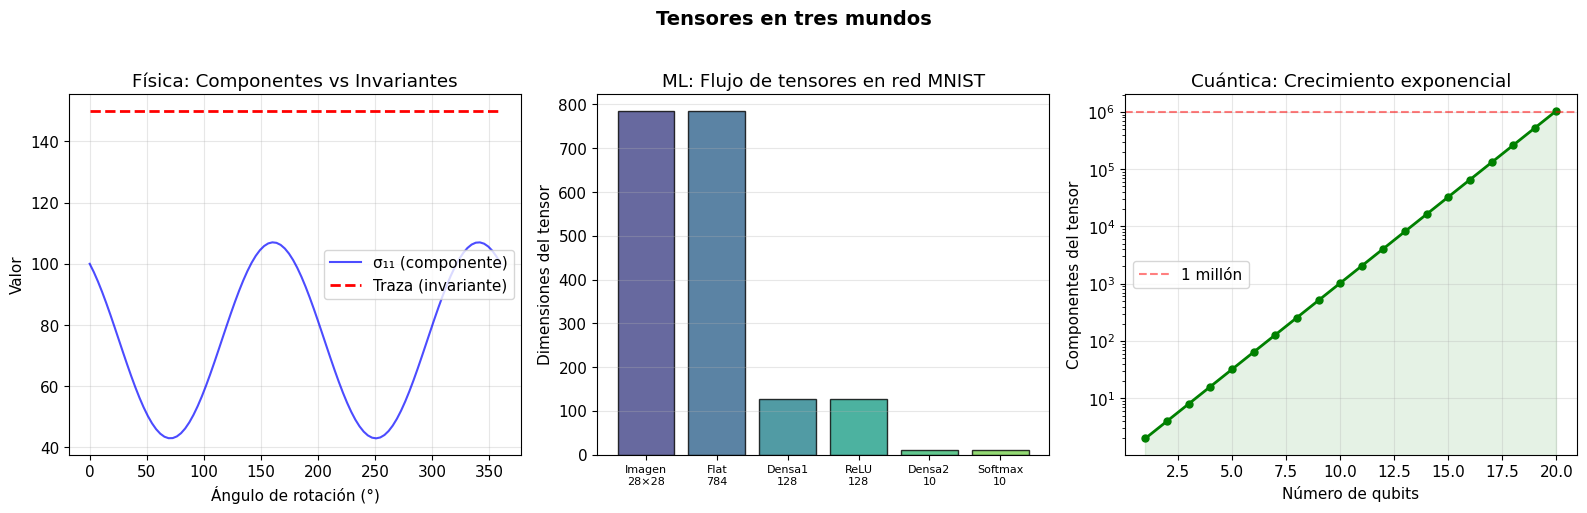

In [55]:
# Visualización final: resumen de todos los conceptos

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# --- Física: tensor de esfuerzos rotado
ax = axes[0]
angulos = np.linspace(0, 360, 100)
sigma = np.array([[100, 20], [20, 50]])
trazas = []
comp_00 = []
for ang in angulos:
    rad = np.radians(ang)
    R = np.array([[np.cos(rad), -np.sin(rad)],
                  [np.sin(rad),  np.cos(rad)]])
    sigma_rot = R @ sigma @ R.T
    trazas.append(np.trace(sigma_rot))
    comp_00.append(sigma_rot[0, 0])
ax.plot(angulos, comp_00, 'b-', label='σ₁₁ (componente)', alpha=0.7)
ax.plot(angulos, trazas, 'r--', linewidth=2, label='Traza (invariante)')
ax.set_xlabel('Ángulo de rotación (°)')
ax.set_ylabel('Valor')
ax.set_title('Física: Componentes vs Invariantes')
ax.legend()
ax.grid(True, alpha=0.3)

# --- ML: shapes a través de la red
ax = axes[1]
capas = ['Imagen\n28×28', 'Flat\n784', 'Densa1\n128', 'ReLU\n128', 'Densa2\n10', 'Softmax\n10']
sizes = [784, 784, 128, 128, 10, 10]
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(capas)))
ax.bar(range(len(capas)), sizes, color=colors, edgecolor='black', alpha=0.8)
ax.set_xticks(range(len(capas)))
ax.set_xticklabels(capas, fontsize=8)
ax.set_ylabel('Dimensiones del tensor')
ax.set_title('ML: Flujo de tensores en red MNIST')
ax.grid(True, alpha=0.3, axis='y')

# --- Cuántica: crecimiento exponencial
ax = axes[2]
n_qubits = np.arange(1, 21)
componentes = 2 ** n_qubits
ax.semilogy(n_qubits, componentes, 'go-', markersize=5, linewidth=2)
ax.fill_between(n_qubits, componentes, alpha=0.1, color='green')
ax.set_xlabel('Número de qubits')
ax.set_ylabel('Componentes del tensor')
ax.set_title('Cuántica: Crecimiento exponencial')
ax.grid(True, alpha=0.3)
ax.axhline(y=1e6, color='red', linestyle='--', alpha=0.5, label='1 millón')
ax.legend()

plt.suptitle('Tensores en tres mundos', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### **Glosario rápido**

| Término | Definición |
|---|---|
| **Tensor** | Objeto matemático que generaliza escalares, vectores y matrices a cualquier número de dimensiones |
| **Orden (rango)** | Número de índices necesarios para especificar un componente del tensor |
| **Componentes** | Los números que representan al tensor en un sistema de coordenadas particular |
| **Invariante** | Propiedad del tensor que no cambia al cambiar el sistema de referencia |
| **Producto tensorial** ($\otimes$) | Operación que combina dos tensores en uno de orden superior |
| **Escalar** | Tensor de orden 0 (un solo número) |
| **Vector** | Tensor de orden 1 (magnitud y dirección) |
| **Batch** | Lote de datos procesados simultáneamente por una red neuronal |
| **Reshape** | Reorganizar las dimensiones de un tensor sin cambiar sus datos |
| **Broadcasting** | Ajuste automático de dimensiones para operar tensores de formas compatibles |
| **Qubit** | Unidad básica de información cuántica; tensor de orden 1 con 2 componentes complejas |
| **Superposición** | Estado cuántico que combina múltiples estados base simultáneamente |
| **Entrelazamiento** | Correlación cuántica donde el tensor del sistema no puede factorizarse |
| **Puerta cuántica** | Matriz unitaria que transforma el estado de uno o más qubits |
| **Espacio de Hilbert** | Espacio vectorial complejo donde viven los estados cuánticos |
| **ReLU** | Función de activación: $\max(0, x)$; elimina valores negativos |
| **Softmax** | Función que convierte un vector de números en probabilidades que suman 1 |
| **Backpropagation** | Algoritmo para calcular gradientes y ajustar los pesos de una red neuronal |

---

*Gracias por acompañarme en este viaje desde los escalares hasta los qubits entrelazados.*